# Temperature Forecast Project

Problem Statement:

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from sklearn.utils import shuffle
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#Reading the csv file from dataset
df=pd.read_csv("temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In the above dataset we have 7752 rows and 25 columns.

In the dataset we have two output or target Next_Tmax(Next day maximum temperature) and Next_Tmin(Next day minimum temperature)

In the target columns we have continous data, so we will use regression method to predict the output.


In [4]:
df.shape

(7752, 25)

The above datatset contains 7752 columns and 25 rows.

In [5]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Give details of the first 5 columns of the dataset

In [6]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


Give details of the last 5 columns of the dataset

In [7]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Giving the details of the columns of the dataset

In [8]:
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

Converting the columns name into list format 

In [9]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

This method help to check the types of columns.
In the above dataset we have float and object datatypes.
In the dataset all the columns are having float value accept Date  which is having object datatype.
Further the dtype of dataset is object

In [10]:
for i in df.columns:
        print(df[i].value_counts())
        print("\n")

1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: Date, Length: 310, dtype: int64


31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: Present_Tmax, Length: 167, dtype: int64


24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: Present_Tmin, Length: 155, dtype: int64


19.794666    2
71.658089    2
77.030350    2
98.524734    2
51.810596    2
        

This method helps in checking the value counts of each columns.


In [11]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

This method helps in checking null values in the dataframe.
In the above dataset different columns consists some null values accept lat,lon,Dem,slope and Solar radiation which does not contain any null values.

<AxesSubplot:>

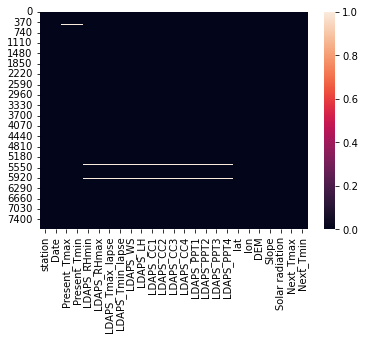

In [12]:

sns.heatmap(df.isnull())


In the above plot we observe that the white lines in the heat map indicates the missing values.

In [13]:
df["Next_Tmin"].unique()

array([21.2, 22.5, 23.9, 24.3, 24. , 23.4, 22.9, 21.6, 21. , 24.5, 22.2,
       22.8, 20.9, 21.1, 23. , 23.7, 23.2, 24.2, 18.7, 21.5, 21.8, 22.3,
       21.3, 20.7, 19.8, 20.8, 21.7, 22.1, 20.5, 21.9, 17.8, 20.1, 20.3,
       19.4, 19.1, 18.9, 20. , 19.7, 19.5, 20.6, 23.1, 23.3, 22.7, 22.6,
       22.4, 22. , 23.5, 23.8, 21.4, 19.3, 20.4, 19.9, 20.2, 24.1, 23.6,
       24.4, 24.8, 25.1, 24.6, 24.7, 25. , 24.9, 25.3, 26. , 26.1, 25.5,
       25.8, 25.4, 25.6, 25.7, 25.2, 25.9, 26.3, 26.2, 26.4, 26.5, 26.9,
        nan, 26.8, 26.6, 27. , 27.1, 26.7, 27.5, 27.2, 27.4, 27.7, 28.3,
       27.6, 28. , 27.3, 19.6, 19.2, 18.6, 18.5, 18.2, 18.4, 18.8, 17.9,
       17.5, 16.5, 18. , 19. , 16.7, 18.1, 18.3, 28.1, 28.4, 29.4, 29.1,
       28.5, 28.8, 29.8, 29.5, 28.6, 17.1, 16.8, 17.6, 17.4, 15.8, 16.9,
       17.7, 17.2, 15.5, 16.6, 16.4, 16.3, 17. , 14.7, 15.9, 16. , 17.3,
       15.4, 15.3, 13.8, 15.6, 15.1, 27.9, 28.7, 27.8, 28.2, 13.3, 14.1,
       15. , 11.3, 13.4, 15.7, 14.9, 16.2, 14.4, 16

In the above data we find the number of unique value present in the target variable Next_Tmin 

In [14]:
df["Next_Tmax"].unique()

array([29.1, 30.5, 31.1, 31.7, 31.2, 31.5, 30.9, 31.3, 32.6, 31.4, 30.8,
       33.1, 31.8, 30.6, 32. , 24.8, 27.3, 28.1, 27.9, 28.2, 28.9, 27.6,
       27.1, 27.5, 26.8, 28.7, 27.8, 29.2, 28.8, 30. , 30.1, 29.4, 31.6,
       30.2, 30.4, 32.5, 31. , 25.2, 28.4, 28.3, 27.4, 26.2, 28. , 26.7,
       28.6, 27.7, 28.5, 30.7, 29.6, 29.9, 29.3, 32.2, 33.6, 30.3, 32.3,
       29.8, 29.7, 29.5, 29. , 23.4, 26.4, 26.6, 26.1, 25.4, 27.2, 27. ,
       26.3, 25.5, 25.6, 25.9, 23. , 26.5, 26. , 25.7, 22.4, 25.8, 25.1,
       24.9, 24.3, 24.5, 25.3, 21.8, 24.7, 25. , 24.6, 23.6, 24.1, 23.2,
       23.7, 24.2, 23.8, 23.9, 31.9, 23.1, 33. , 32.7, 26.9, 32.1, 33.3,
       32.4, 33.4, 33.5, 34.8, 34. , 34.3, 34.5,  nan, 32.8, 33.7, 33.2,
       32.9, 34.1, 34.9, 35.3, 34.6, 35. , 33.9, 34.7, 36.6, 34.4, 35.8,
       35.2, 33.8, 35.6, 35.1, 34.2, 36. , 35.5, 35.4, 21.6, 23.5, 24.4,
       24. , 35.9, 36.1, 22.5, 22.8, 36.2, 21.1, 23.3, 22. , 22.7, 20.9,
       22.2, 22.1, 37. , 36.9, 22.9, 35.7, 37.1, 22

In the above data we find the number of unique value present in the target variable Next_Tmax

In [15]:
df["station"].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In the above data we find the number of unique value present in the input variable station .

As we observe in the dataset there is 25 unique value present, after 25 values station column is giving us null values.

In [16]:
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

In [17]:
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

In [18]:
df.skew()

station             0.000182
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

In the above dataset we find the skewness present in different columns LDAPS_RHmax, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4.

Further in the skewed columns of the dataset, outliers are also present

In [19]:
print("The mean of Present_Tmax is:",df["Present_Tmax"].mean())  
print("The mean of Present_Tmin is:",df["Present_Tmin"].mean())
print("The mean of LDAPS_RHmin is:",df["LDAPS_RHmin"].mean())
print("The mean of LDAPS_Tmax_lapse  is:",df["LDAPS_Tmax_lapse"].mean())
print("The mean of LDAPS_CC1  is:",df["LDAPS_CC1"].mean())
print("The mean of LDAPS_CC2 is:",df["LDAPS_CC2"].mean())
print("The mean of Next_Tmax is:",df["Next_Tmax"].mean())
print("The mean of Next_Tmin is:",df["Next_Tmin"].mean())

The mean of Present_Tmax is: 29.76821140328037
The mean of Present_Tmin is: 23.22505857849521
The mean of LDAPS_RHmin is: 56.75937215069287
The mean of LDAPS_Tmax_lapse  is: 29.613446542813577
The mean of LDAPS_CC1  is: 0.36877358559828194
The mean of LDAPS_CC2 is: 0.35608043728396527
The mean of Next_Tmax is: 30.274886731391593
The mean of Next_Tmin is: 22.93222006472492


In [20]:
columns=["Present_Tmax", "Present_Tmin","LDAPS_RHmin","LDAPS_Tmax_lapse","LDAPS_CC1","LDAPS_CC2","Next_Tmax","Next_Tmin"]

for x in columns:
    df[x] = df[x].replace(np.nan, df[x].mean())

In [21]:
print("The median of LDAPS_RHmax is:",df["LDAPS_RHmax"].median())
print("The median of LDAPS_Tmin_lapse is:",df["LDAPS_Tmin_lapse"].median())
print("The median of LDAPS_WS is:",df["LDAPS_WS"].median())
print("The median of LDAPS_LH  is:",df["LDAPS_LH"].median())
print("The median of LDAPS_CC3  is:",df["LDAPS_CC3"].median())
print("The median of LDAPS_CC4 is:",df["LDAPS_CC4"].median())
print("The median of LDAPS_PPT1 is:",df["LDAPS_PPT1"].median())
print("The median of LDAPS_PPT2 is:",df["LDAPS_PPT2"].median())
print("The median of LDAPS_PPT3 is:",df["LDAPS_PPT3"].median())
print("The median of LDAPS_PPT4 is:",df["LDAPS_PPT4"].median())

The median of LDAPS_RHmax is: 89.79347992
The median of LDAPS_Tmin_lapse is: 23.76019884
The median of LDAPS_WS is: 6.547470301
The median of LDAPS_LH  is: 56.86548154
The median of LDAPS_CC3  is: 0.262554604
The median of LDAPS_CC4 is: 0.227664469
The median of LDAPS_PPT1 is: 0.0
The median of LDAPS_PPT2 is: 0.0
The median of LDAPS_PPT3 is: 0.0
The median of LDAPS_PPT4 is: 0.0


In [22]:
col= ["LDAPS_RHmax", "LDAPS_Tmin_lapse", "LDAPS_WS", "LDAPS_LH", "LDAPS_CC3", "LDAPS_CC4", "LDAPS_PPT1", "LDAPS_PPT2", "LDAPS_PPT3", "LDAPS_PPT4"]
for i in col:
    df[i] = df[i].replace(np.nan, df[i].median())

In [23]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

After replacing the nan values we are checking null values again.

In the above dataset there is no missing values

<AxesSubplot:>

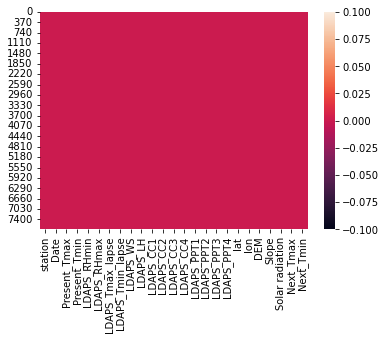

In [24]:
sns.heatmap(df.isnull())

In the above plot we clearly visualize there is no null values in the dataset  as  we have clear plot without any white line

In [25]:
df=shuffle(df)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
5086,12.0,17-07-2016,22.0,19.2,57.304298,89.589195,27.562251,20.587396,5.181961,25.567671,...,0.000000,0.001135,0.000000,37.5507,126.988,132.1180,0.5931,5735.509766,28.0,18.9
1186,12.0,16-08-2013,31.3,25.5,50.235939,85.836761,31.531563,26.534356,10.122218,34.472351,...,0.000000,0.000000,0.000000,37.5507,126.988,132.1180,0.5931,5019.580078,32.3,25.3
7557,8.0,23-08-2017,30.1,24.8,79.395729,92.554276,28.799581,23.760000,12.469378,61.814976,...,0.000000,2.955204,0.000000,37.4697,126.910,52.5180,1.5629,4708.868164,28.9,24.0
5050,1.0,16-07-2016,20.7,17.8,83.488251,99.719872,22.351011,19.858516,10.131825,36.228899,...,0.377714,0.068617,0.103723,37.6046,126.991,212.3350,2.7850,5827.258789,20.7,18.5
6648,24.0,17-07-2017,29.5,26.4,60.910015,86.954498,30.782322,24.178302,5.648758,42.674121,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5678.131836,31.1,23.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,5.0,09-07-2014,32.9,24.8,30.018888,94.961853,33.331769,24.452330,6.839780,189.224246,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.5055,5789.660645,34.7,23.8
1989,15.0,17-07-2014,28.4,22.9,83.219475,93.391785,25.871089,23.620178,7.094973,48.883946,...,6.975902,0.658351,0.011510,37.5507,126.937,30.0464,0.8552,5697.161133,31.2,21.8
207,8.0,08-07-2013,26.3,23.2,77.726677,96.357498,27.311138,23.181936,9.130718,32.579113,...,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5803.580566,27.2,23.8
7061,12.0,03-08-2017,31.9,25.5,39.351791,73.393059,34.398238,25.374629,7.097504,23.941015,...,0.000000,0.000000,0.000000,37.5507,126.988,132.1180,0.5931,5403.180176,35.1,24.1


In [26]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In thde above method we are checking the type of dataset.

In the dataset there is only 2 datatype is present object and float datatype.

Further the dtype of the dataset is object

In [27]:
df['Date']=pd.to_datetime(df['Date'])

This method helps to convert the date column from object type to datetime column

In [28]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

In the above dataset we have converted Date column data type from object to datetime type.

In [29]:
df["Day"]=df["Date"].dt.day

df["Month"]=df["Date"].dt.month

df["Year"]=df["Date"].dt.year

In [30]:
df.drop("Date",axis=1,inplace=True)

In [31]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
5086,12.0,22.0,19.2,57.304298,89.589195,27.562251,20.587396,5.181961,25.567671,0.336133,...,37.5507,126.988,132.1180,0.5931,5735.509766,28.0,18.9,17,7,2016
1186,12.0,31.3,25.5,50.235939,85.836761,31.531563,26.534356,10.122218,34.472351,0.449009,...,37.5507,126.988,132.1180,0.5931,5019.580078,32.3,25.3,16,8,2013
7557,8.0,30.1,24.8,79.395729,92.554276,28.799581,23.760000,12.469378,61.814976,0.626414,...,37.4697,126.910,52.5180,1.5629,4708.868164,28.9,24.0,23,8,2017
5050,1.0,20.7,17.8,83.488251,99.719872,22.351011,19.858516,10.131825,36.228899,0.499747,...,37.6046,126.991,212.3350,2.7850,5827.258789,20.7,18.5,16,7,2016
6648,24.0,29.5,26.4,60.910015,86.954498,30.782322,24.178302,5.648758,42.674121,0.189043,...,37.5237,126.909,17.2956,0.2223,5678.131836,31.1,23.9,17,7,2017


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7752 entries, 5086 to 49
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Present_Tmax      7752 non-null   float64
 2   Present_Tmin      7752 non-null   float64
 3   LDAPS_RHmin       7752 non-null   float64
 4   LDAPS_RHmax       7752 non-null   float64
 5   LDAPS_Tmax_lapse  7752 non-null   float64
 6   LDAPS_Tmin_lapse  7752 non-null   float64
 7   LDAPS_WS          7752 non-null   float64
 8   LDAPS_LH          7752 non-null   float64
 9   LDAPS_CC1         7752 non-null   float64
 10  LDAPS_CC2         7752 non-null   float64
 11  LDAPS_CC3         7752 non-null   float64
 12  LDAPS_CC4         7752 non-null   float64
 13  LDAPS_PPT1        7752 non-null   float64
 14  LDAPS_PPT2        7752 non-null   float64
 15  LDAPS_PPT3        7752 non-null   float64
 16  LDAPS_PPT4        7752 non-null   float64

This method gives the good overview of the dataset.

In the above dataset there is no null values present in the data.

In the dataset there is float and int data type present.

The total memory usage of the dataset is 1.7 MB

In [33]:
df.nunique()

station               25
Present_Tmax         168
Present_Tmin         156
LDAPS_RHmin         7673
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7676
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7570
LDAPS_CC2           7583
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            184
Next_Tmin            158
Day                   21
Month                 12
Year                   5
dtype: int64

This method shows the number of unique values present in each column.

In column LDAPS_Tmax_lapse there is a high number of unique value 7676 present.



In [34]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year'],
      dtype='object')

This method helps to show the number of columns in the dataset 

In [35]:
df['Next_Tmax'].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
18.9      1
37.9      1
20.5      1
21.5      1
37.6      1
Name: Next_Tmax, Length: 184, dtype: int64

This method shows the number of value count present in target variable Next_Tmax

In [36]:
df['Next_Tmin'].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
28.2      1
13.3      1
14.6      1
29.5      1
14.3      1
Name: Next_Tmin, Length: 158, dtype: int64

This method shows the number of value count present in target variable Next_Tmin

In [37]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.997033,29.768211,23.225059,56.759372,88.388529,29.613447,23.514984,7.092549,62.450457,0.368774,...,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,16.374742,7.080882,2015.000516
std,7.213007,2.956557,2.403036,14.596973,7.158471,2.932898,2.334099,2.173913,33.571540,0.261185,...,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,8.243617,2.238124,1.414487
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,7.000000,1.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.313244,89.793480,29.662273,23.760199,6.547470,56.865482,0.320110,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,31.000000,12.000000,2017.000000


This method shows the statistical summary of the dataset.

The summary of this dataset looks perfect since there is no negative/ invalid values present.

The counts of columns are same as there are no missing values present in the dataset.

In most of the columns, median is greater than mean.

There is a huge difference between the max and 75% percentile so there are outliers present in the data.



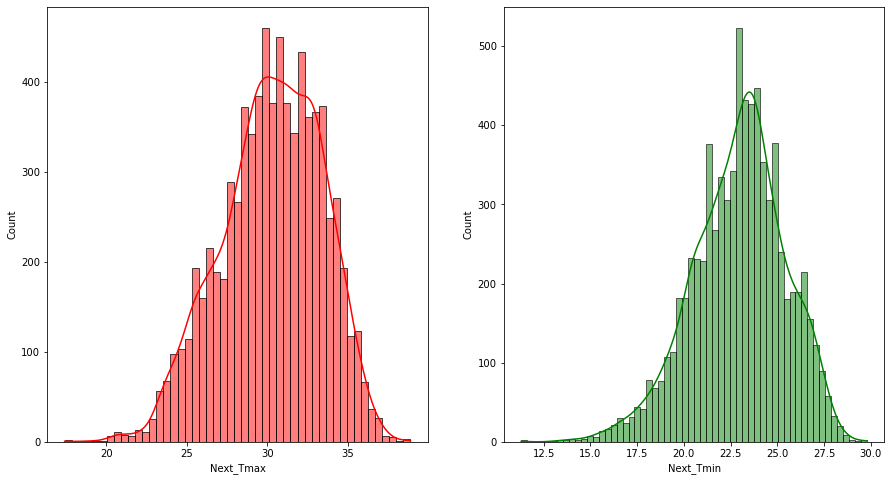

In [38]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='g')
plt.show()

In the above plot the data is normally distributed in both the target variables Next_Tmax and Next_Tmin and there is no skewness present in these columns.

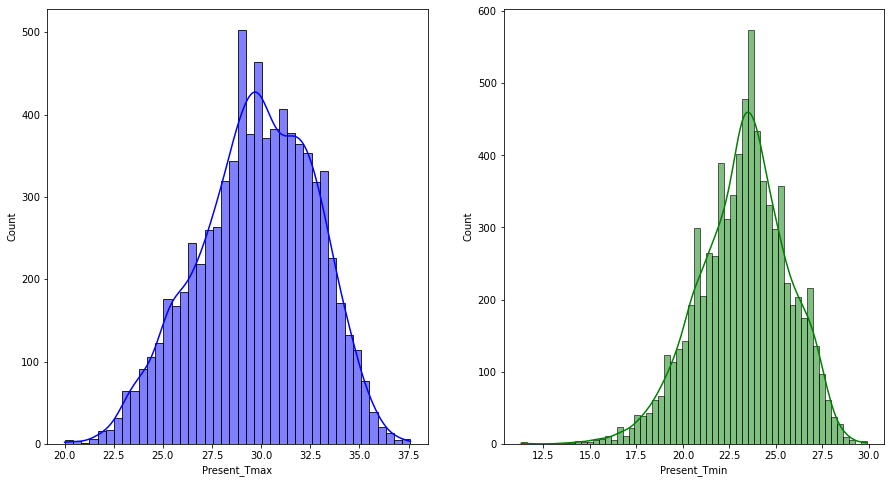

In [39]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='g')
plt.show()

In the column present_Tmax and column present_Tmin data is normally distributed and there is no skewness present 

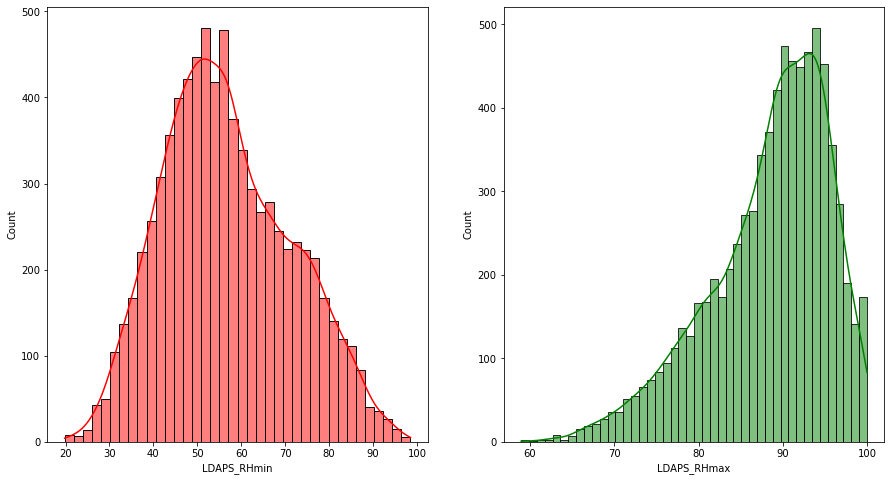

In [40]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='g')
plt.show()

In the above plot in column LDAPS_RHmin data is normally distributed and there is no skewness present in the column.

In column LDAPS_RHmax it is skewed to left due to which median is more than the mean.

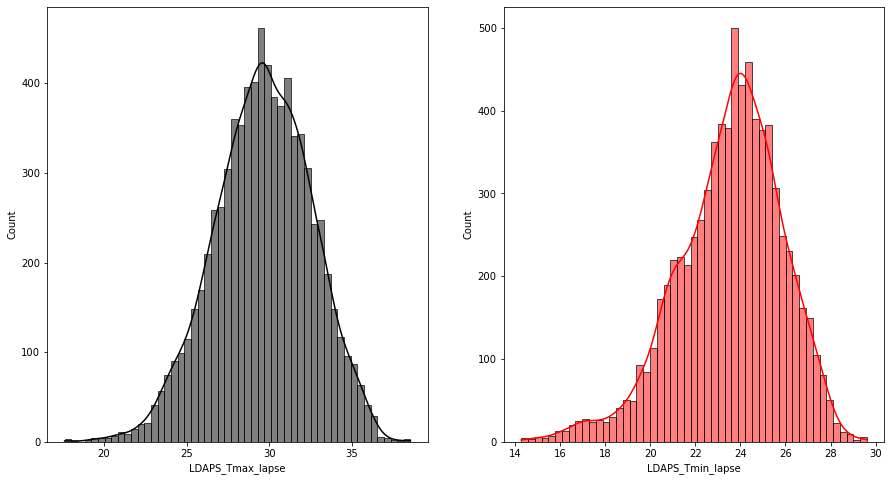

In [41]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color="black")
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='red')
plt.show()

In the above plot data is normally distributed in both the columns.

There is no skewness in the column LDAPS_Tmax_lapse but in column LDAPS_Tmin_lapse there is little skewness present in left 

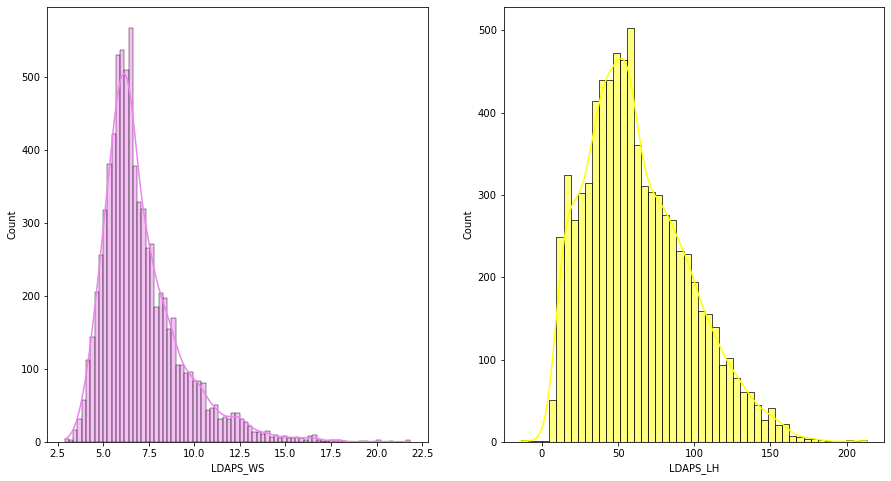

In [42]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_WS'],kde=True,color='violet')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_LH'],kde=True,color='yellow')
plt.show()


The data is almost normallay distributed in both the columns.

In column LDAPS_WS the median is greater than the mean due to which it skewed to the right.


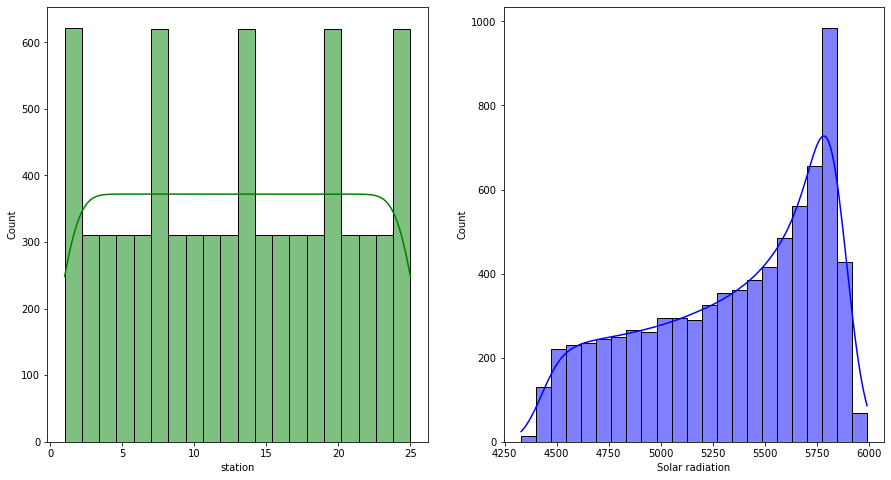

In [43]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['station'],kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(df['Solar radiation'],kde=True,color="b")
plt.show()

In station column data is normally distributed and there is no skewness present.

In column solar radiation there is skewness present in left

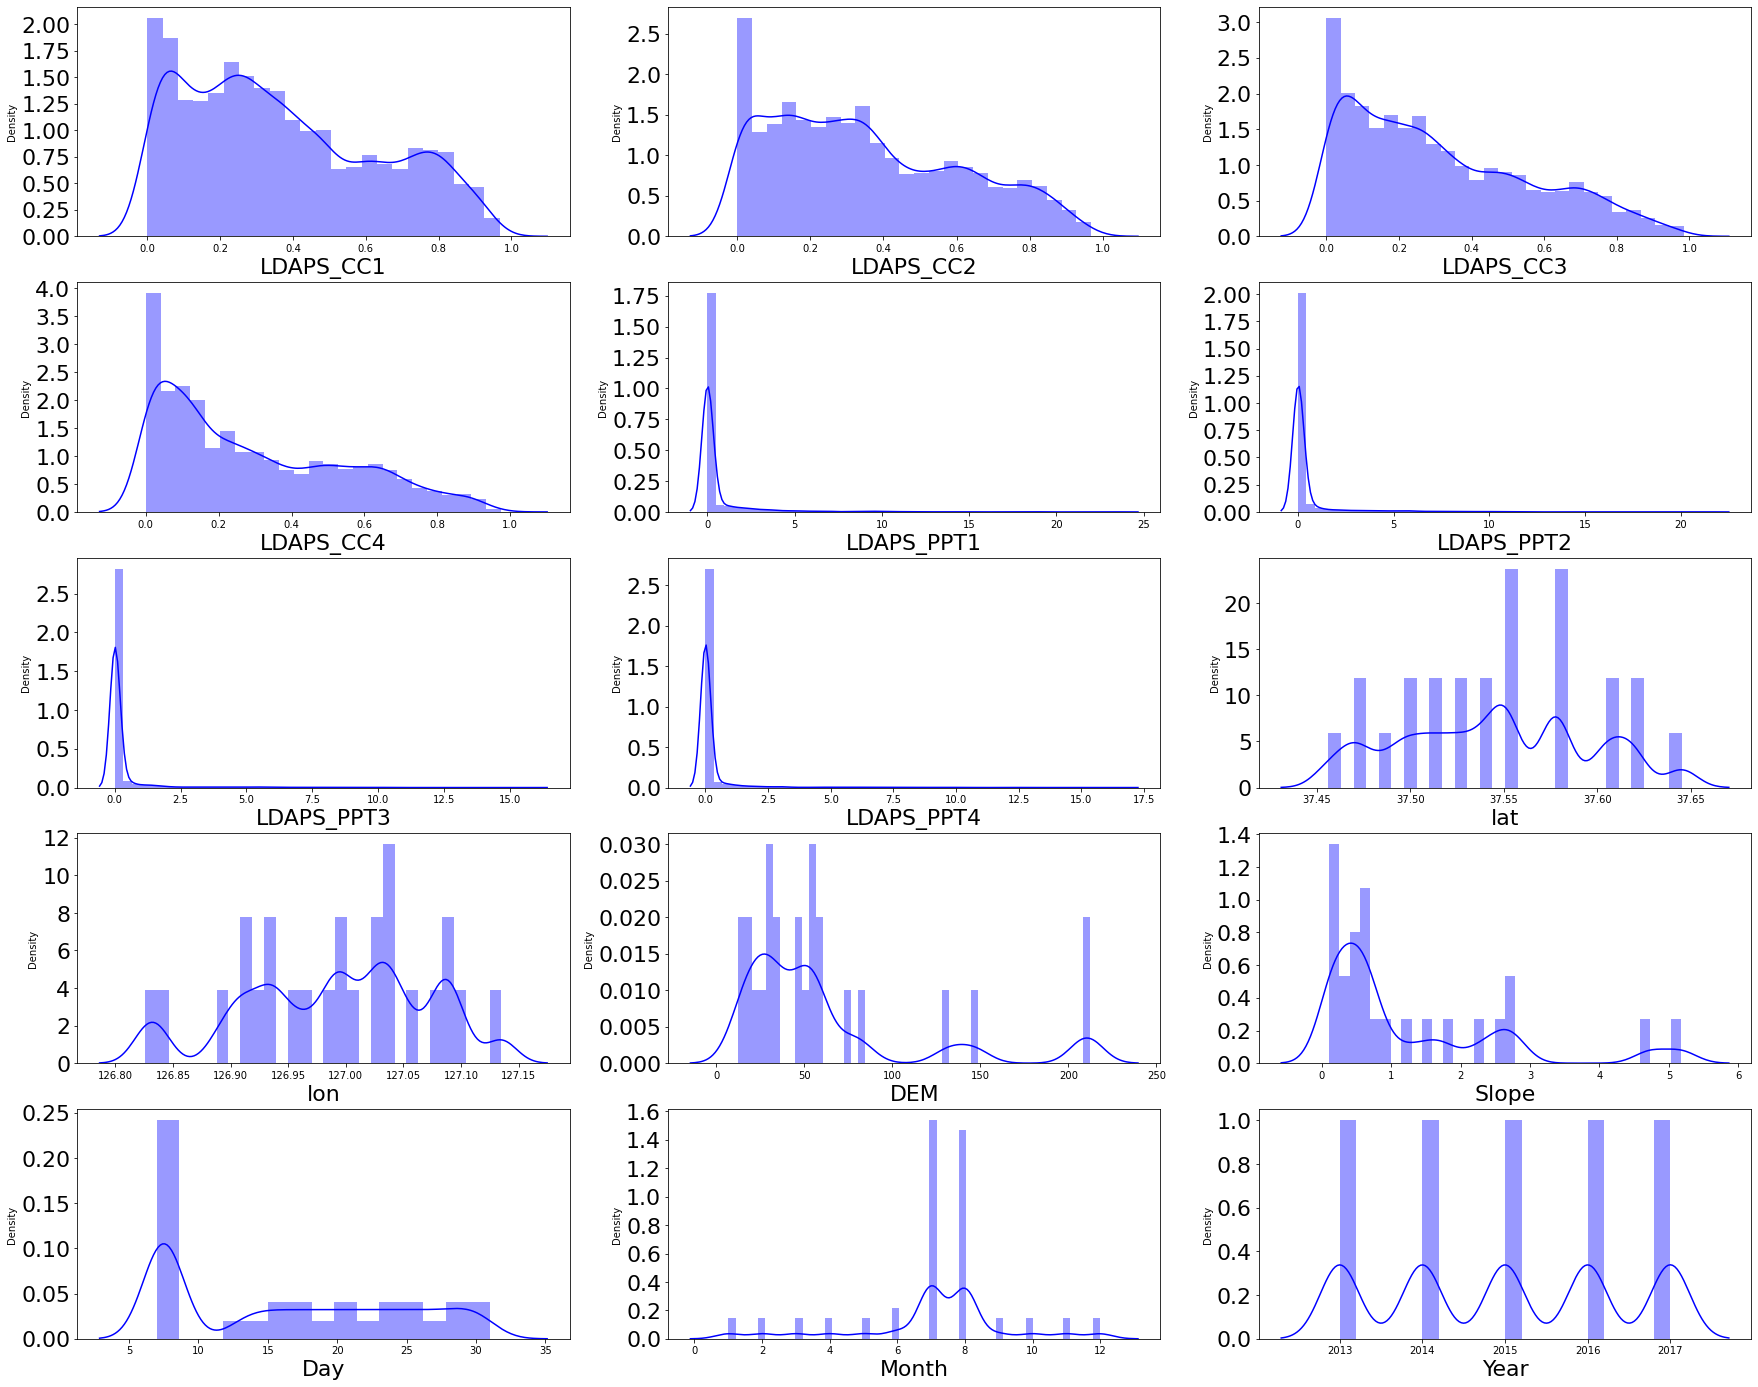

In [44]:
plt.figure(figsize=(30,60),facecolor='white')
plotnumber=1
for column in df.columns.drop(["Next_Tmax","Next_Tmin","Solar radiation"]):
    if plotnumber>=10:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(df[column],color="blue")
        plt.xlabel(column,fontsize=22)
        plt.yticks(rotation=0,fontsize=22)
    plotnumber+=1
plt.show()

From the above distribution plot we can observe that the data is almost normal in first three columns but they are skewed to right.

Most of the columns have right skewness and the data is not normal in those columns.



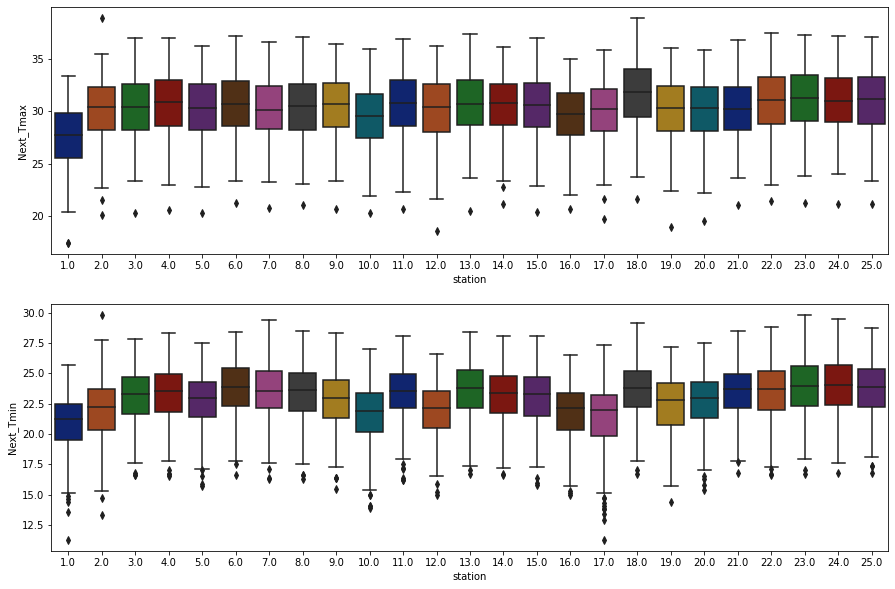

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.boxplot(df['station'],df["Next_Tmax"],data=df,palette="dark")
plt.subplot(2,1,2)
sns.boxplot(df['station'],df["Next_Tmin"],data=df,palette="dark")
plt.show()

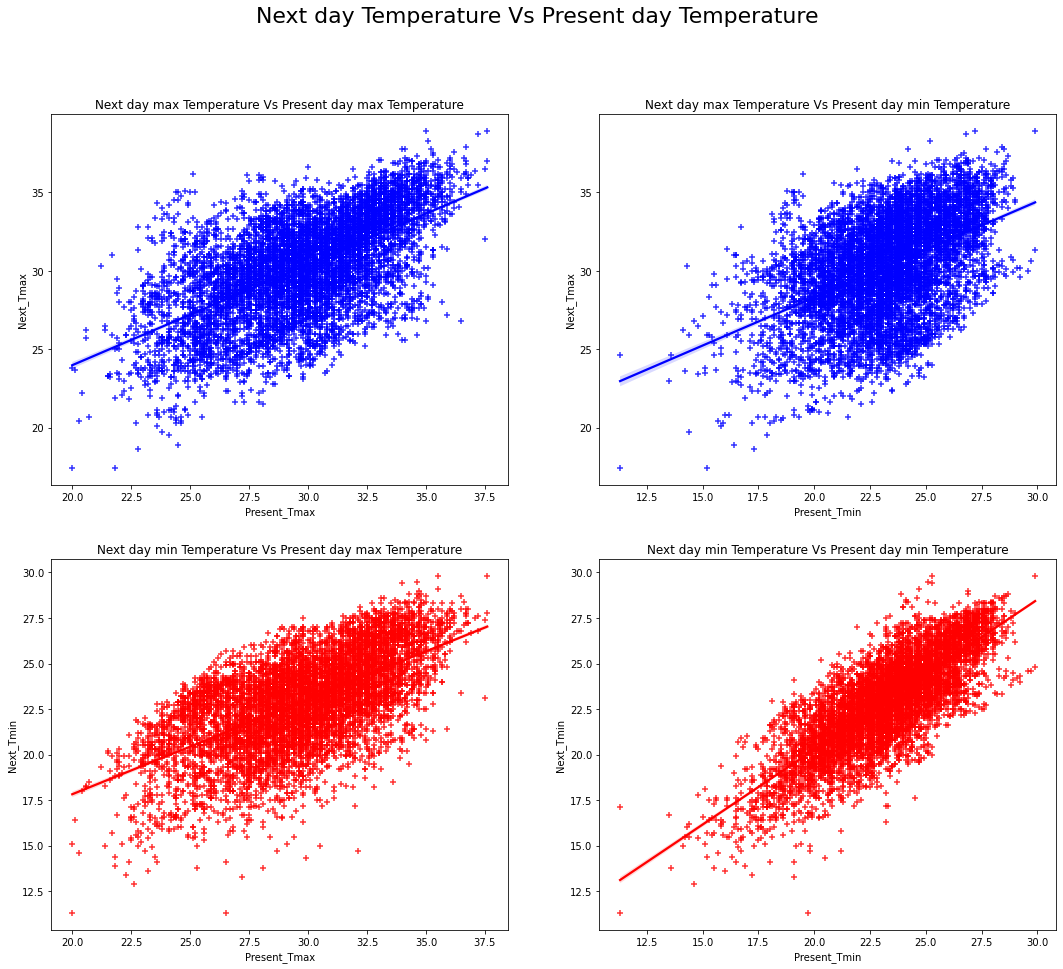

In [46]:
plt.figure(figsize=(18,15))
plt.suptitle('Next day Temperature Vs Present day Temperature',fontsize=22)

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmax',data=df,marker="+",color='b')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmax',data=df,marker="+",color='b')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax',y='Next_Tmin',data=df,marker="+",color='r')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',y='Next_Tmin',data=df,marker="+",color="r")
plt.show()



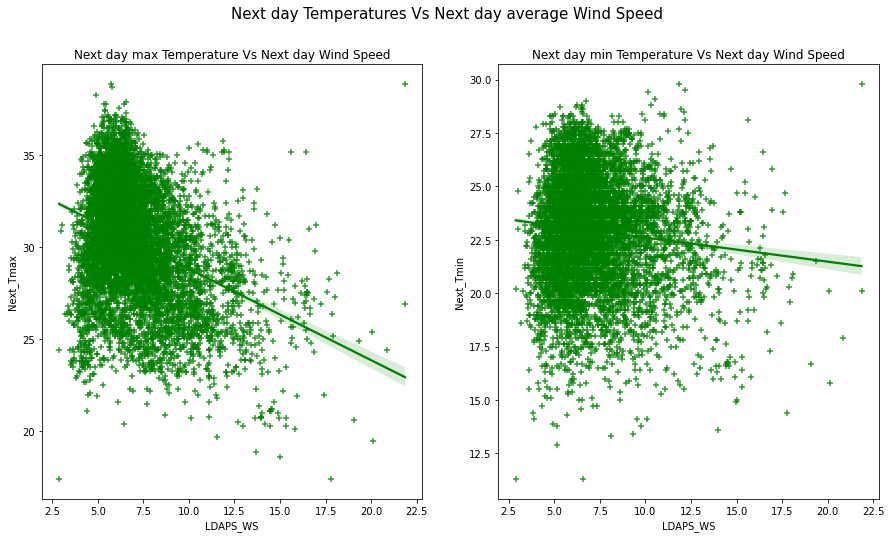

In [47]:
plt.figure(figsize=(15,8))
plt.suptitle('Next day Temperatures Vs Next day average Wind Speed',fontsize=15)

plt.subplot(1,2,1)
plt.title('Next day max Temperature Vs Next day Wind Speed') 
sns.regplot(x='LDAPS_WS',y='Next_Tmax',data=df,marker='+',color="g")

plt.subplot(1,2,2)
plt.title('Next day min Temperature Vs Next day Wind Speed') 
sns.regplot(x='LDAPS_WS',y='Next_Tmin',data=df,marker='+',color="g")
plt.show()

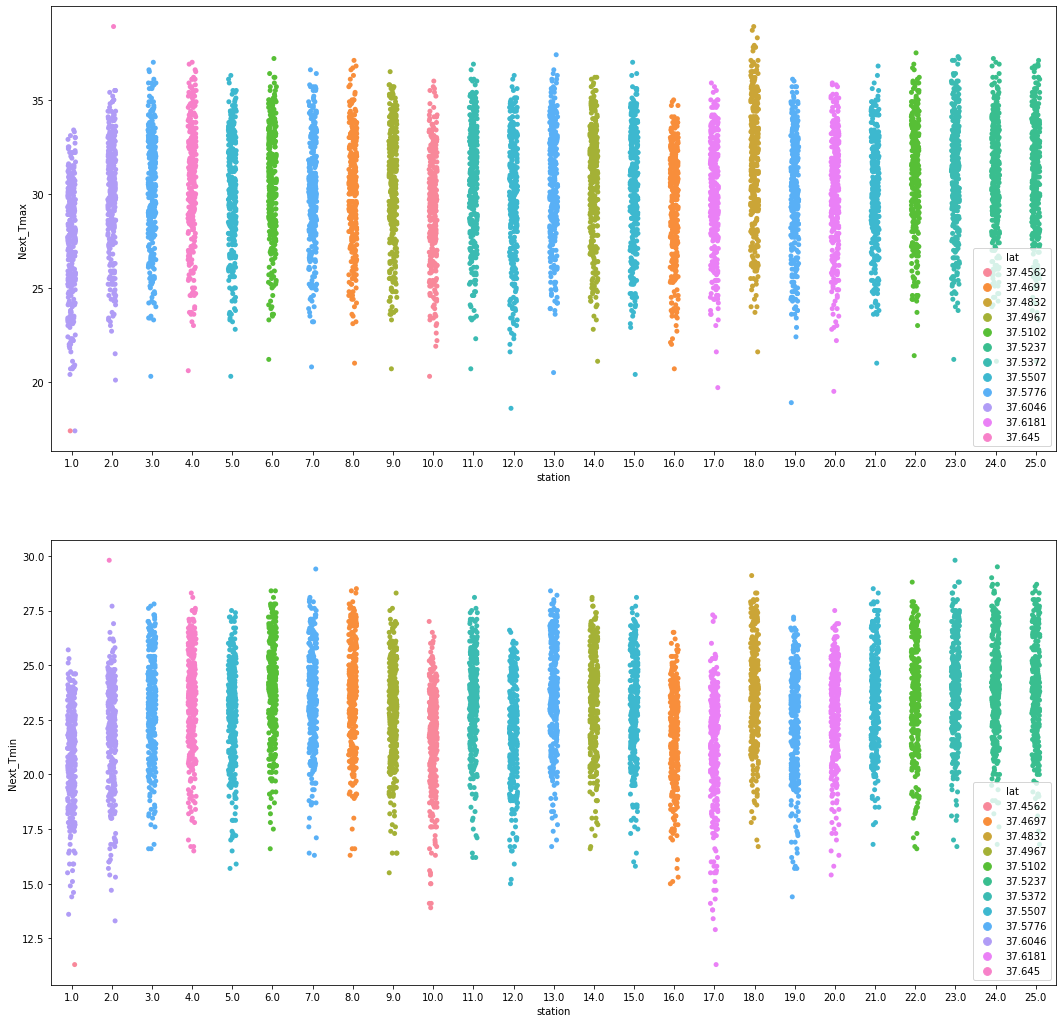

In [48]:
plt.figure(figsize=(18,18))
plt.subplot(2,1,1)
sns.stripplot(df['station'],df["Next_Tmax"],data=df,hue=df["lat"])
plt.subplot(2,1,2)
sns.stripplot(df['station'],df["Next_Tmin"],data=df,hue=df["lat"])
plt.show()

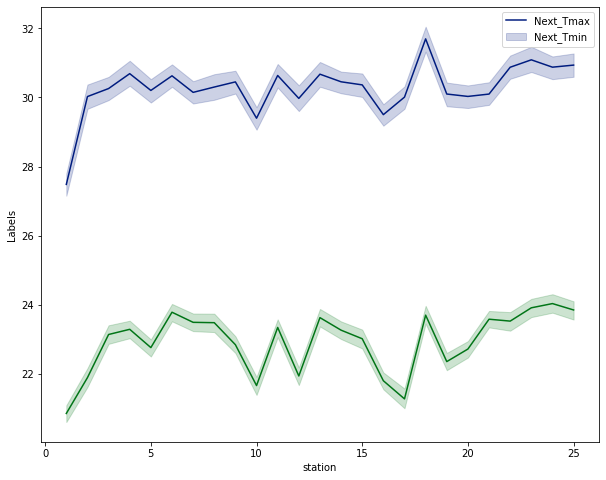

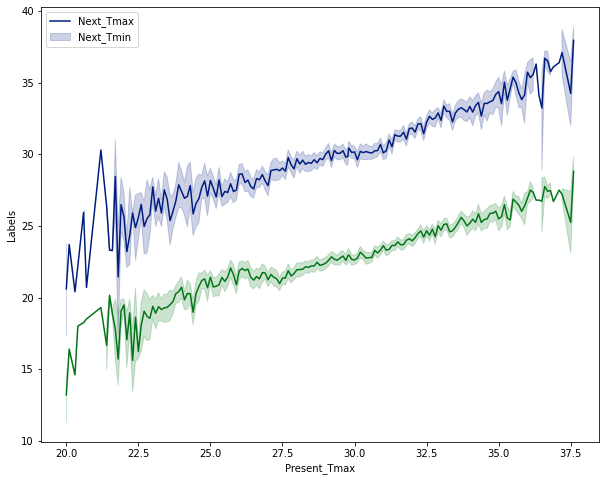

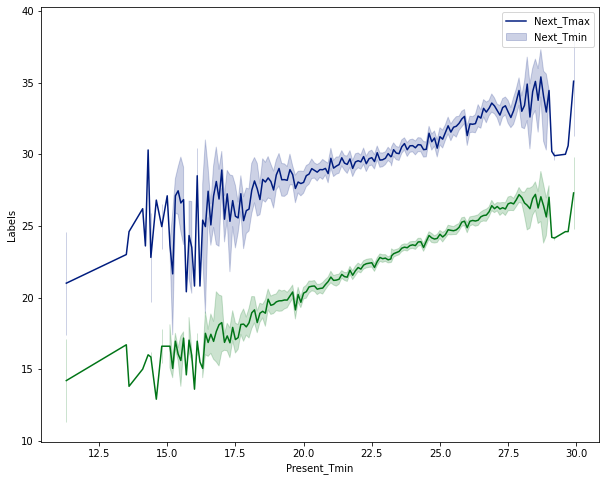

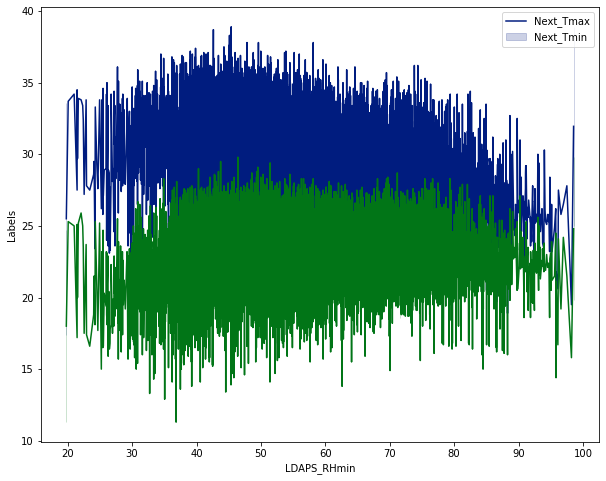

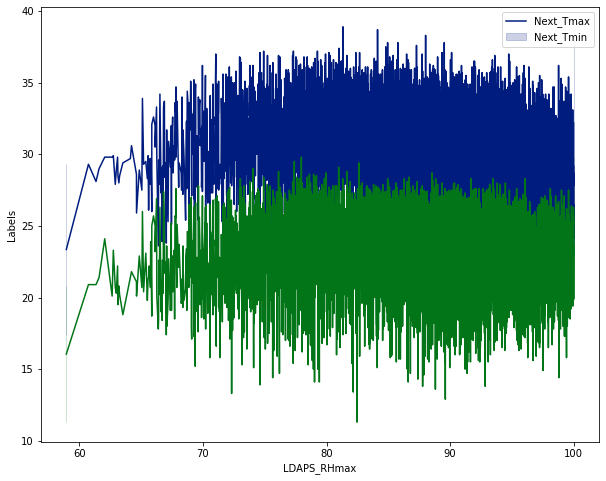

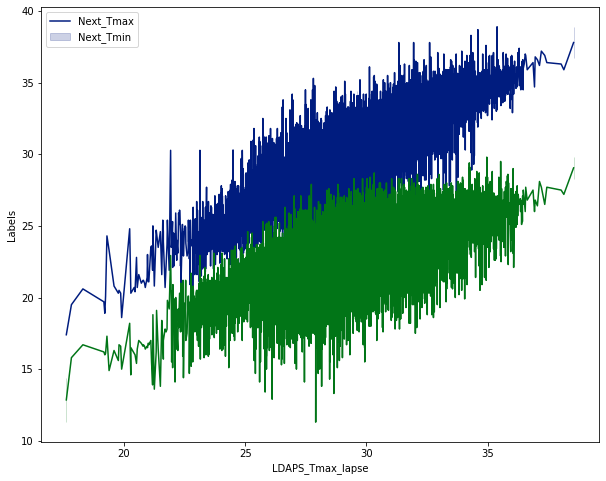

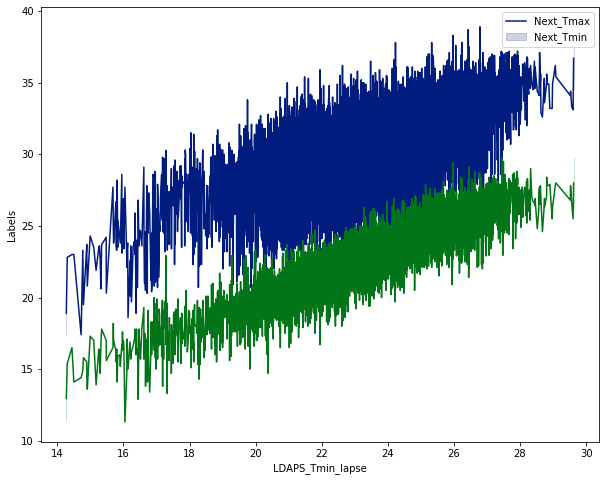

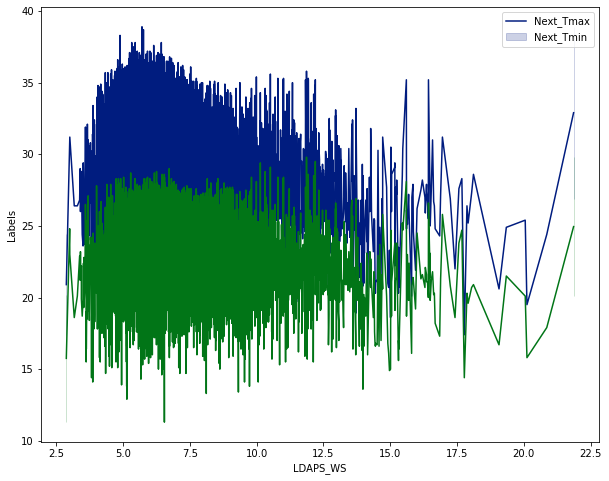

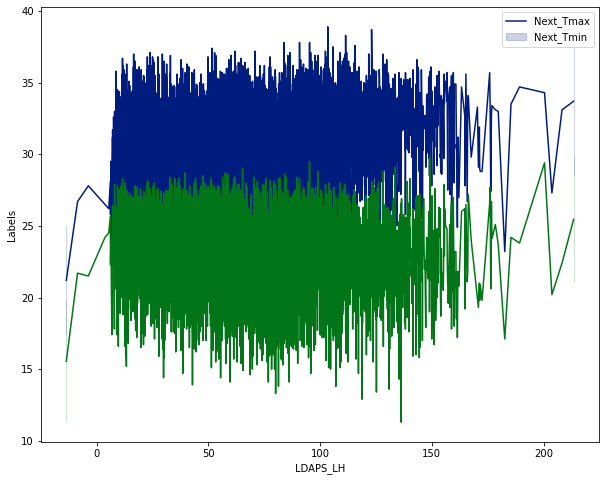

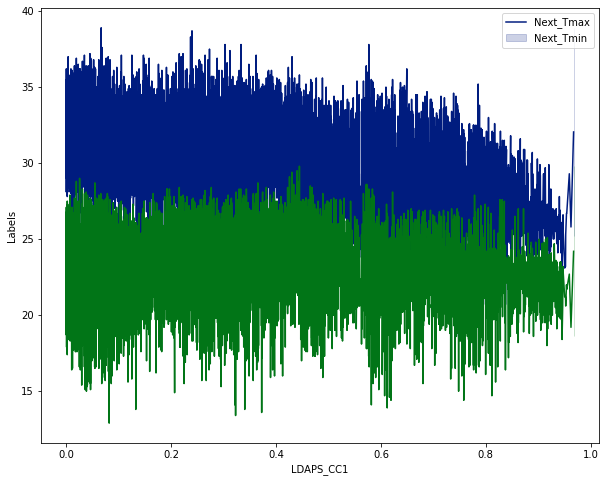

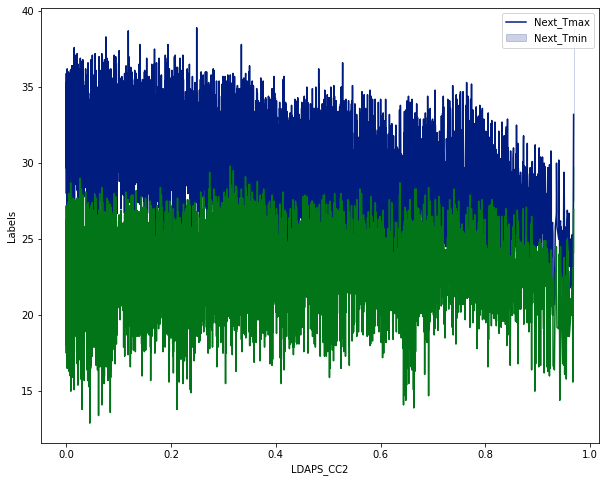

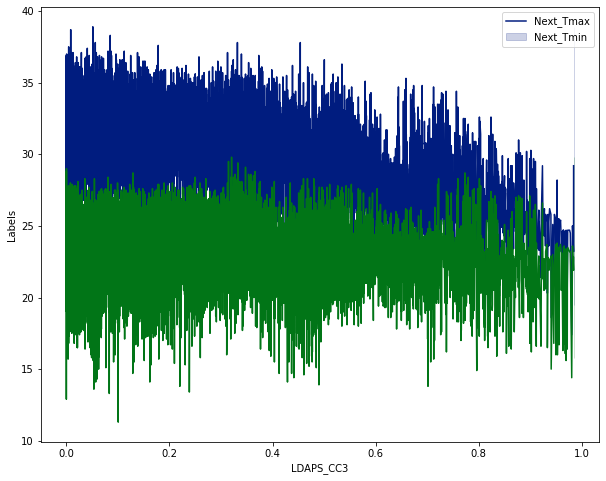

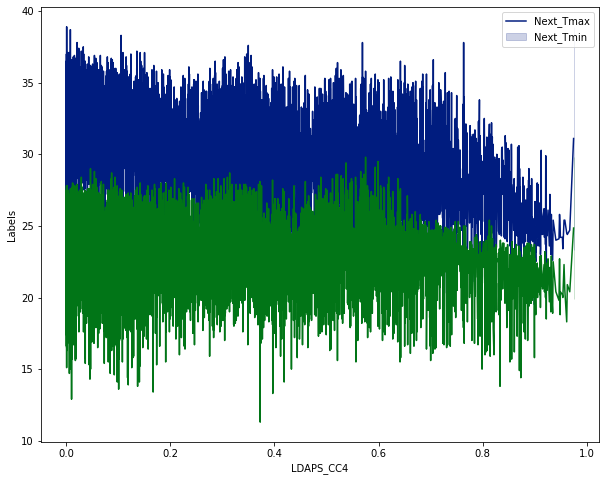

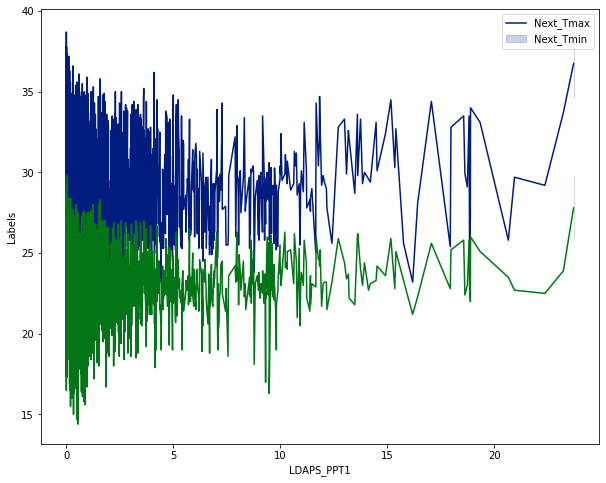

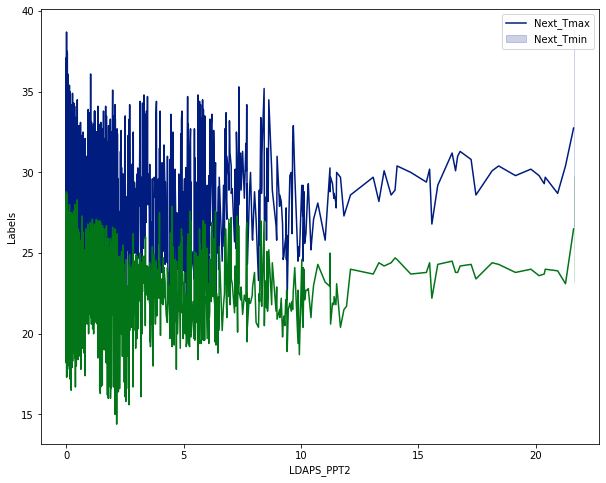

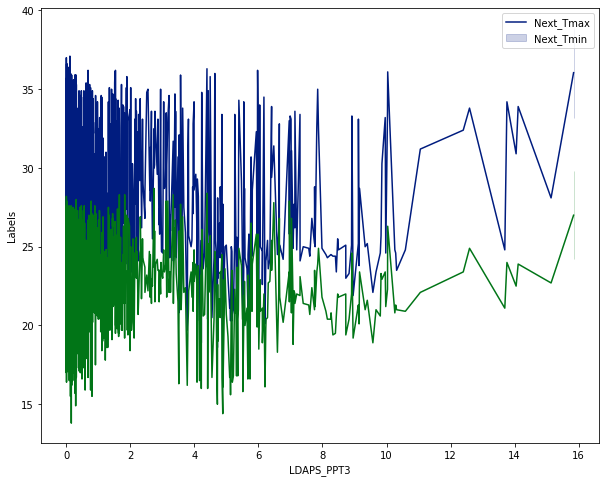

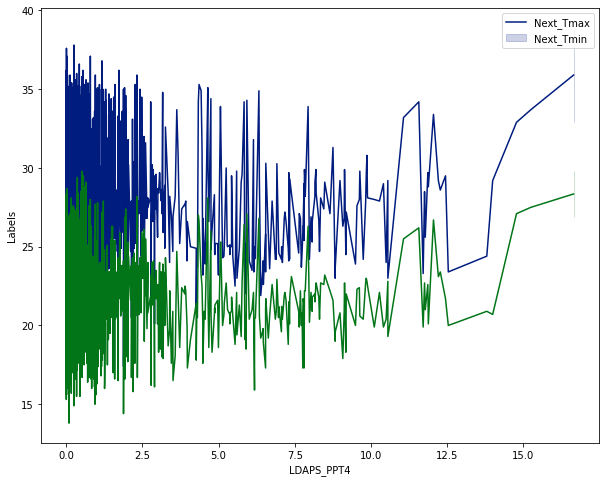

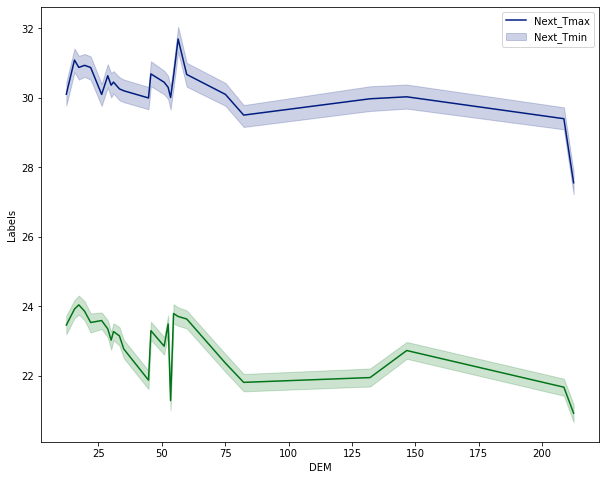

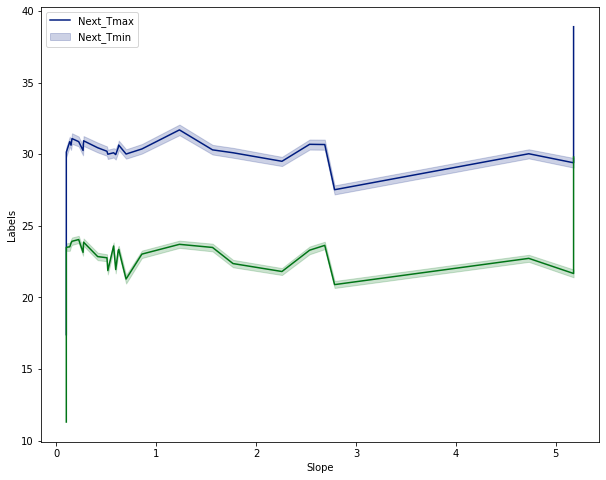

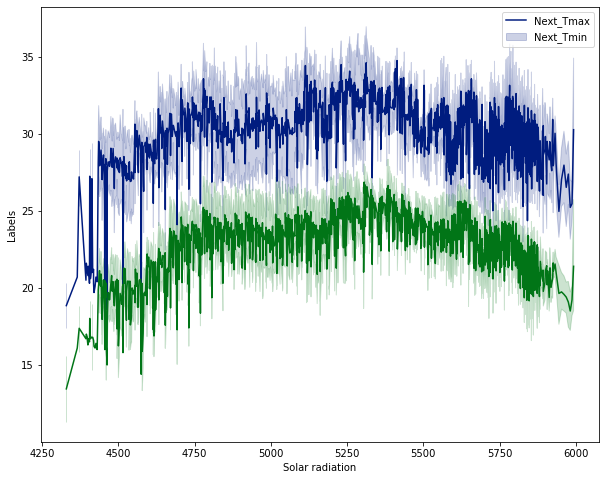

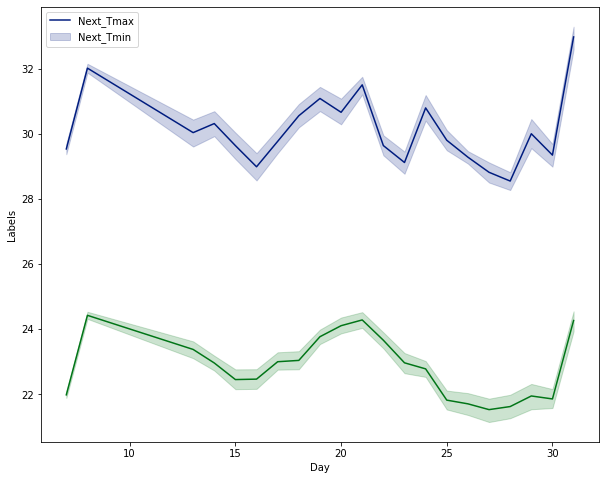

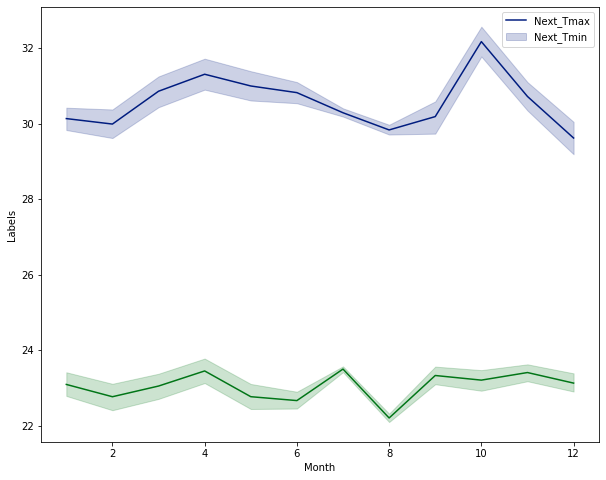

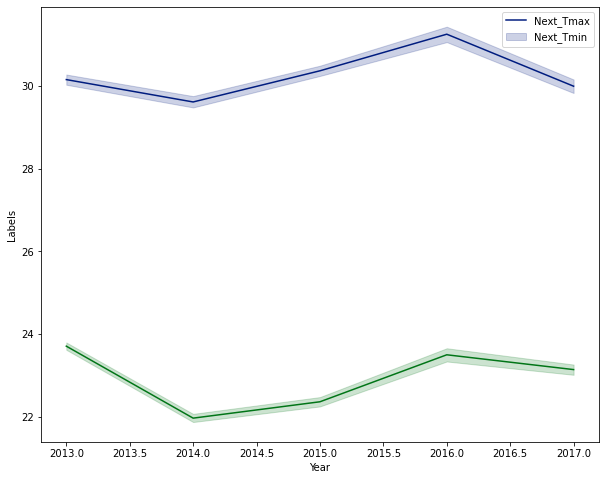

In [49]:
feature_columns = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 
                   'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 
                   'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'Day', 
                   'Month', 'Year']

label_columns = ['Next_Tmax', 'Next_Tmin']

plt.style.use('seaborn-dark-palette')

for z in df[feature_columns]:
    plt.figure(figsize=(10,8))
    sns.lineplot(x=df[z], y=label_columns[0], data=df)
    sns.lineplot(x=df[z], y=label_columns[1], data=df)
    plt.ylabel("Labels")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(['Next_Tmax', 'Next_Tmin'], fontsize=10)
    plt.show()

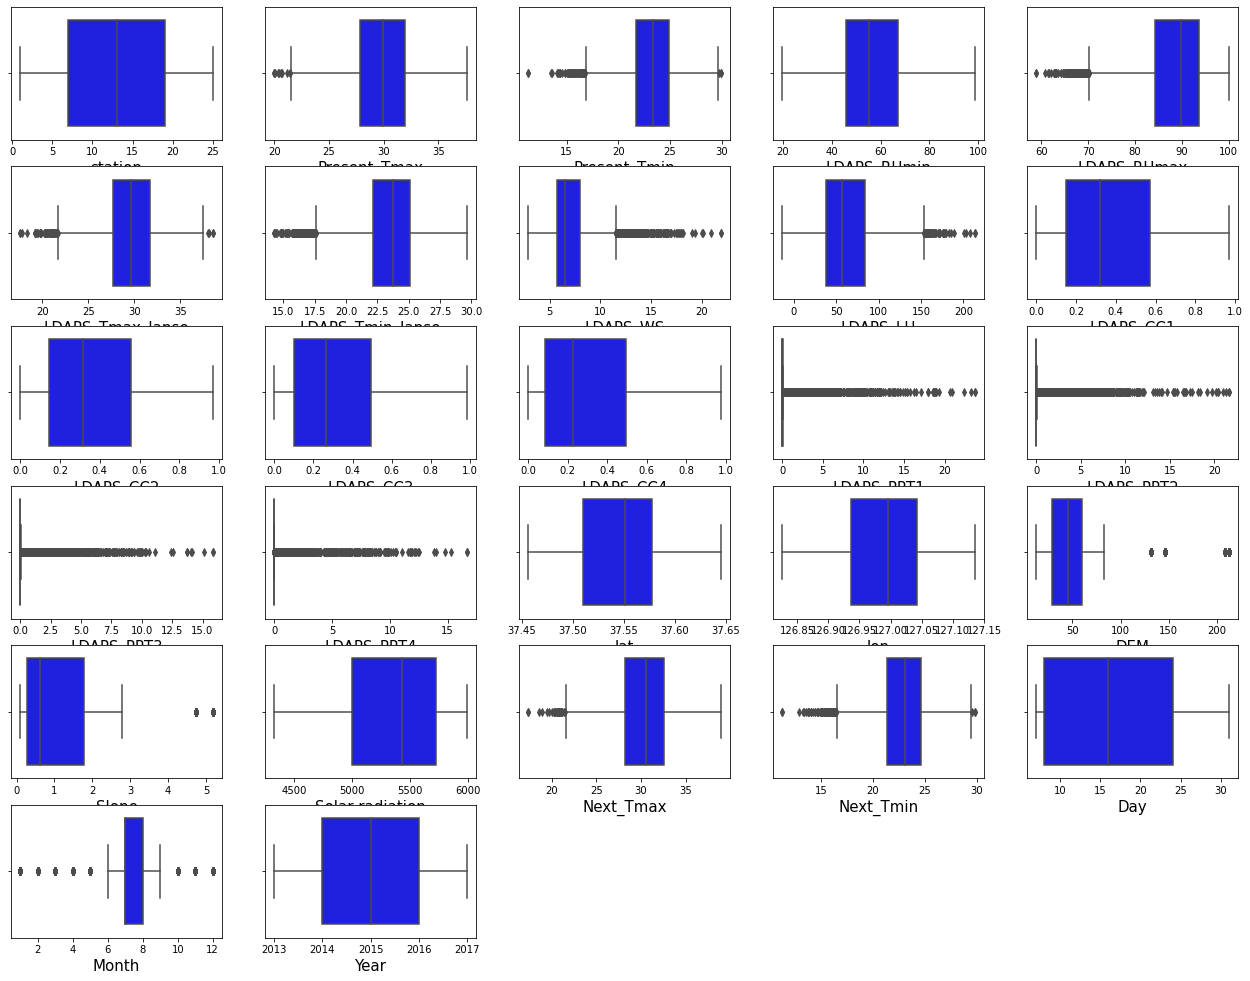

In [50]:
plt.figure(figsize=(22,23),facecolor='white')
plotnumber=1
for column in df.columns:
    if plotnumber<=27:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In the above plot column Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Next_Tmax,Next_Tmin and Month have outliers present 


In [51]:
outliers=df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Month']]

from scipy.stats import zscore

z=np.abs(zscore(outliers))

z

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Month
5086,2.627621,1.675097,0.167737,0.699420,1.254350,0.878928,1.098703,0.302656,0.273714,0.237261,0.222227,1.294304,0.484508,0.036141
1186,0.518132,0.946756,0.356491,0.654043,1.293676,1.393738,0.833441,0.246792,0.273714,0.238242,0.222227,1.294304,0.484508,0.410691
7557,0.112229,0.655439,0.581970,0.277513,0.104979,2.473501,0.018930,0.222128,0.273714,2.317234,0.222227,0.172266,0.223191,0.410691
5050,3.067350,2.257731,1.583030,2.476358,1.566645,1.398157,0.781115,0.075367,0.058466,0.178906,0.135833,2.772243,1.115004,0.036141
6648,0.090723,1.321306,0.200339,0.398565,0.284204,0.664187,0.589118,0.302656,0.273714,0.238242,0.222227,0.821213,0.755095,0.036141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,1.059337,0.655439,0.918317,1.267880,0.401614,0.116281,3.776472,0.069901,0.273714,0.238242,0.222227,0.494322,0.548433,0.857523
1989,0.462802,0.135279,0.698973,1.276076,0.045071,0.001115,0.404134,0.145321,3.701641,0.331059,0.212640,0.586289,0.293244,0.036141
207,1.173133,0.010429,1.113294,0.785045,0.142697,0.937618,0.889839,0.002207,0.273714,0.238242,0.222227,0.172266,0.223191,0.410691
7061,0.721084,0.946756,2.094922,1.631527,0.796781,0.002279,1.147160,0.302656,0.273714,0.238242,0.222227,1.294304,0.484508,1.823468


In [52]:
new_dataframe=df[(z<3).all(axis=1)] 
new_dataframe

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
5086,12.0,22.0,19.2,57.304298,89.589195,27.562251,20.587396,5.181961,25.567671,0.336133,...,37.5507,126.988,132.1180,0.5931,5735.509766,28.0,18.9,17,7,2016
1186,12.0,31.3,25.5,50.235939,85.836761,31.531563,26.534356,10.122218,34.472351,0.449009,...,37.5507,126.988,132.1180,0.5931,5019.580078,32.3,25.3,16,8,2013
7557,8.0,30.1,24.8,79.395729,92.554276,28.799581,23.760000,12.469378,61.814976,0.626414,...,37.4697,126.910,52.5180,1.5629,4708.868164,28.9,24.0,23,8,2017
6648,24.0,29.5,26.4,60.910015,86.954498,30.782322,24.178302,5.648758,42.674121,0.189043,...,37.5237,126.909,17.2956,0.2223,5678.131836,31.1,23.9,17,7,2017
4435,11.0,30.5,23.9,33.603432,81.050812,32.232312,22.358455,4.814056,55.203029,0.215011,...,37.5372,127.085,28.7000,0.6233,4768.980469,32.2,21.7,22,8,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,19.0,30.8,20.4,40.471619,74.571259,33.032244,24.574413,7.822055,55.956088,0.064377,...,37.5776,126.938,75.0924,1.7678,5676.257813,33.4,23.8,19,7,2016
3351,2.0,32.7,21.2,41.211926,82.832710,35.529816,25.893375,5.957043,55.979088,0.050024,...,37.6046,127.032,44.7624,0.5141,5789.401367,35.5,22.9,7,10,2015
383,9.0,29.2,23.2,79.773064,89.440971,26.858132,24.496973,13.329554,55.310689,0.551534,...,37.4967,126.826,50.9312,0.4125,5734.894531,28.7,24.4,15,7,2013
207,8.0,26.3,23.2,77.726677,96.357498,27.311138,23.181936,9.130718,32.579113,0.536341,...,37.4697,126.910,52.5180,1.5629,5803.580566,27.2,23.8,7,8,2013


Creating the new dataframe after removing the outliers.

In [53]:
df.shape

(7752, 27)

This method shows the shape of original dataset with 7752 columns and 27 rows.


In [54]:
new_dataframe.shape

(6907, 27)

This method shows the shape of new dataframe after removing the outliers

In [55]:
data_loss = (7752-6907)/7752*100
data_loss

10.900412796697626

 we are losing 10% of data through zscore method 

In [56]:
Q1=outliers.quantile(0.25)

Q3=outliers.quantile(0.75)

IQR=Q3 - Q1

dataset=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [57]:
dataset.shape

(2413, 27)

In [58]:
data_loss = (7752-2413)/7752*100
data_loss

68.87254901960785

In IQR method we are losing 68.87% of data.

In [59]:
corr= df.corr()
corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
station,1.000000,0.112806,0.132122,-0.066731,-0.166334,0.069363,0.105053,0.004353,-0.133693,0.006769,...,-0.237438,-0.118574,-0.256095,-0.090413,-0.018787,0.108289,0.128713,-0.000730,-0.000169,-0.000582
Present_Tmax,0.112806,1.000000,0.618760,-0.204571,-0.300322,0.570129,0.624216,-0.123582,0.134251,-0.311805,...,-0.052615,0.009020,-0.187121,-0.105809,-0.025439,0.610348,0.622741,-0.143899,-0.001185,0.059665
Present_Tmin,0.132122,0.618760,1.000000,0.123143,-0.012754,0.464151,0.764227,-0.037708,-0.011276,0.084447,...,-0.078475,-0.043461,-0.250275,-0.146339,0.053578,0.471806,0.796670,-0.108728,-0.003550,0.036987
LDAPS_RHmin,-0.066731,-0.204571,0.123143,1.000000,0.579032,-0.564580,0.089471,0.294271,-0.070848,0.613818,...,0.087099,-0.076237,0.102115,0.123744,0.244080,-0.437898,0.095019,-0.065735,-0.053922,-0.001984
LDAPS_RHmax,-0.166334,-0.300322,-0.012754,0.579032,1.000000,-0.373334,-0.113914,0.134786,0.238183,0.436570,...,0.195761,0.025662,0.177134,0.219557,0.148259,-0.281341,-0.070246,-0.012803,-0.039040,-0.142223
LDAPS_Tmax_lapse,0.069363,0.570129,0.464151,-0.564580,-0.373334,1.000000,0.653985,-0.311900,0.048004,-0.438439,...,-0.042093,0.090666,-0.178895,-0.162332,0.047971,0.827189,0.586868,-0.160495,-0.021745,0.015978
LDAPS_Tmin_lapse,0.105053,0.624216,0.764227,0.089471,-0.113914,0.653985,1.000000,-0.130245,-0.134906,0.010900,...,-0.096252,-0.026700,-0.195445,-0.185839,0.159445,0.588206,0.881059,-0.177770,-0.026990,-0.004937
LDAPS_WS,0.004353,-0.123582,-0.037708,0.294271,0.134786,-0.311900,-0.130245,1.000000,0.007115,0.289356,...,0.036646,-0.059448,0.190995,0.171577,0.122966,-0.345619,-0.098767,-0.028982,-0.082375,-0.110409
LDAPS_LH,-0.133693,0.134251,-0.011276,-0.070848,0.238183,0.048004,-0.134906,0.007115,1.000000,-0.147276,...,0.133203,0.025819,0.055126,0.086770,-0.046553,0.155608,-0.056906,-0.012227,-0.023536,0.057462
LDAPS_CC1,0.006769,-0.311805,0.084447,0.613818,0.436570,-0.438439,0.010900,0.289356,-0.147276,1.000000,...,-0.008131,-0.006843,-0.014090,-0.020752,0.218309,-0.452541,-0.011028,-0.019928,-0.076224,-0.066300


This method shows the correlation between the features and the target variables.


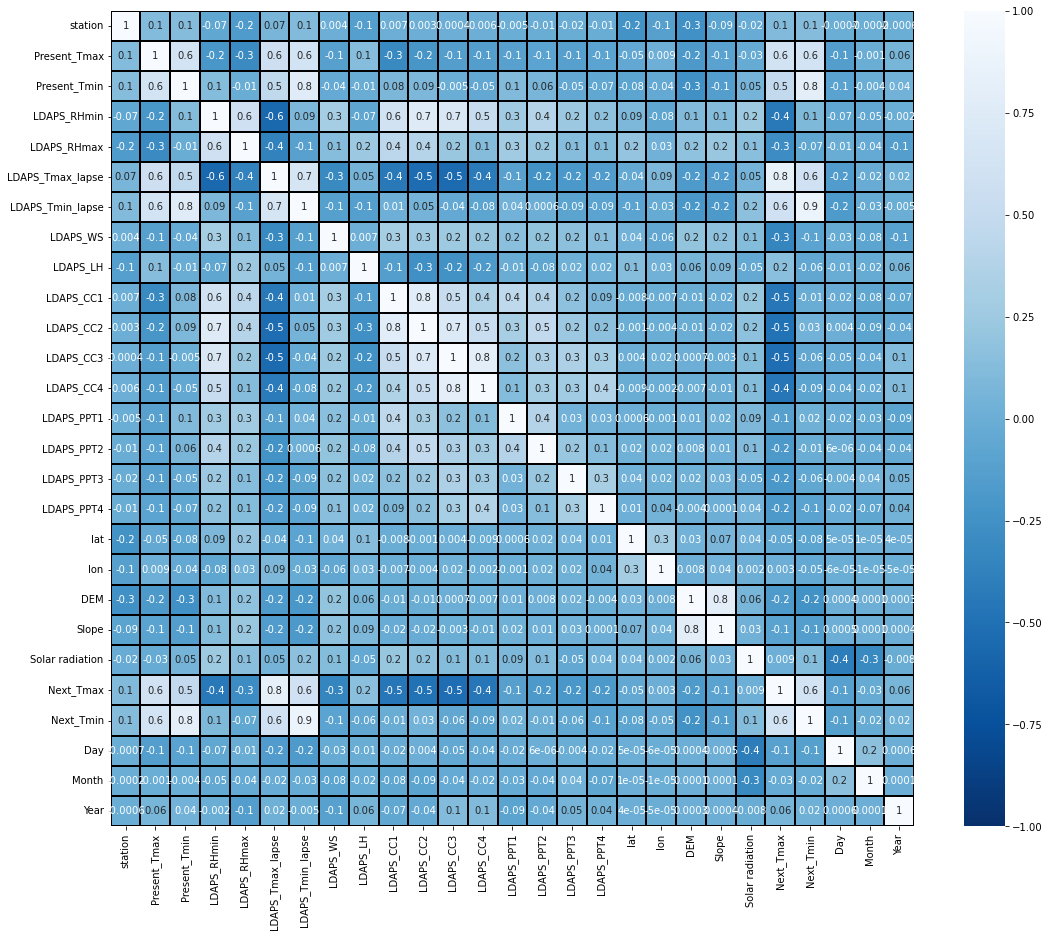

In [60]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()


This heatmap shows the correlation matrix by visualizing the data. 

The label Next_Tmax is highly positively correlated with LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, Present_Tmax, Present_Tmin and Next_Tmin.

The label is negatively correlated with LDAPS_CC1, LDAPS_CC2, LDAPS_CC3, LDAPS_CC4, LDAPS_RHmax, LDAPS_RHmin, and LDAPS_WS.

The features lon and Solar radiations have very less correlation with the target Next_Tmin.

The label Next_Tmin is highly positively correlated with LDAPS_Tmin_lapse, Present_Tmin, LDAPS_Tmax_lapse, Present_Tmax and Next_Tmax.

The label is negatively correlated with DEM, Slope and Day.



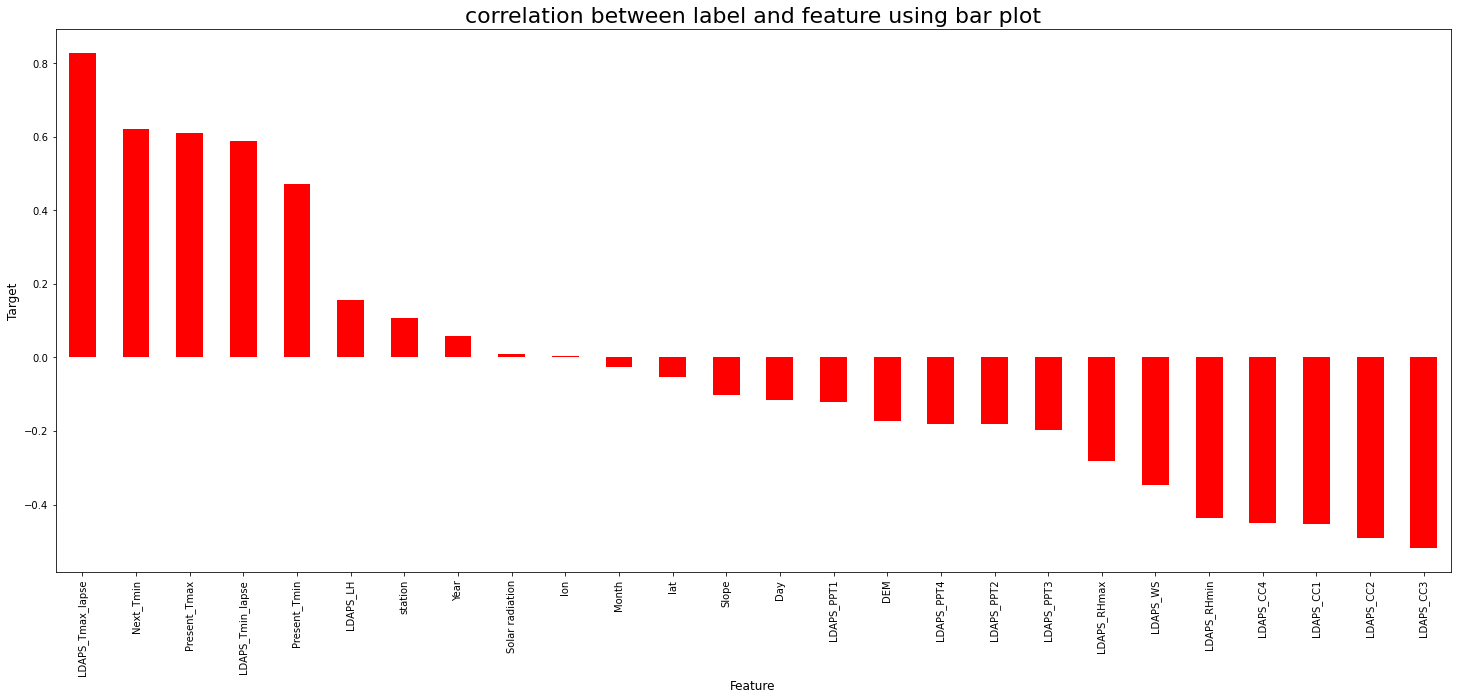

In [61]:
plt.figure(figsize=(25,10))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=12)
plt.ylabel('Target',fontsize=12)
plt.title('correlation between label and feature using bar plot',fontsize=22)
plt.show()

In [62]:
x = df.drop("Next_Tmax", axis=1)
y = df["Next_Tmax"]

In [63]:
x.shape

(7752, 26)

In [64]:
y.shape

(7752,)

In [65]:
x.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmin          -0.404447
Day                 0.245283
Month              -0.705586
Year               -0.000365
dtype: float64

In the above method skewness is present in some columns as columns contains skewness greater than +0.5 and -0.5.


In [66]:
skewness=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [67]:
x[skewness] = scaler.fit_transform(x[skewness].values)
x[skewness].head()

,LDAPS_RHmax,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Month
5086,0.015498,-1.249736,-1.030493,-1.156421,-0.291226,-1.438408,-0.557339,-0.519114,-0.468210,-0.444377,1.364199,-0.243155,0.953422,-0.126054
1186,-0.537144,1.412025,1.390976,-0.806219,-1.107399,-1.087432,0.343301,-0.519114,-0.492283,-0.444377,1.364199,-0.243155,-0.856619,0.363879
7557,0.525957,0.017017,1.935691,0.092011,1.674884,-1.168556,0.621650,-0.519114,2.562063,-0.444377,0.271491,0.779596,-1.391558,0.363879
5050,2.075554,-1.495356,1.393655,-0.741539,0.166821,0.350808,1.866585,1.730131,0.639499,1.243595,1.834978,1.314153,1.255917,-0.126054
6648,-0.382724,0.209427,-0.654316,-0.514100,-0.427176,-0.587722,-0.557339,-0.519114,-0.492283,-0.444377,-1.400633,-1.072947,0.773298,-0.126054


In [68]:
x.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.116481
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Next_Tmin          -0.404447
Day                 0.245283
Month               0.043780
Year               -0.000365
dtype: float64

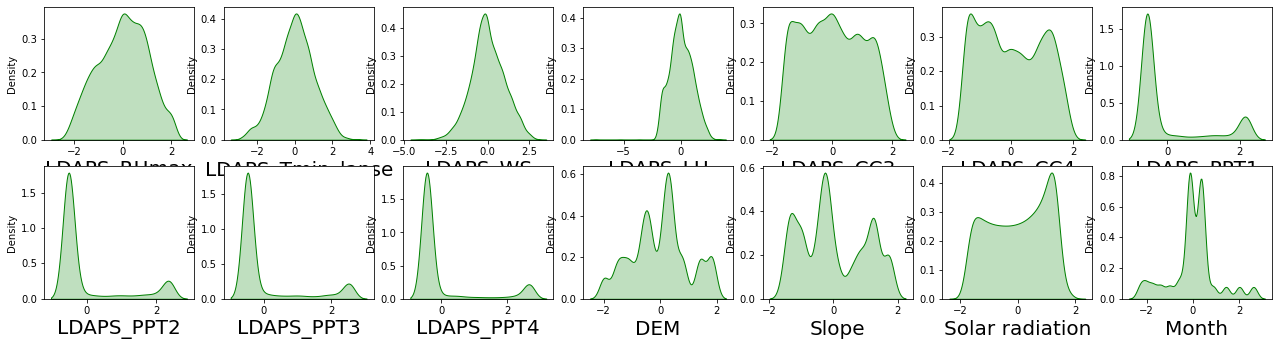

In [69]:
plt.figure(figsize=(22,20), facecolor='white')
plotnumber = 1

for column in x[skewness]:
    if plotnumber<=18:
        ax = plt.subplot(7,7,plotnumber)
        sns.distplot(x[column],color='green',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In the above plot skewness has been removed in all the columns.
Further in columns LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 the skewness is reduced.



In [70]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
x=pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,Day,Month,Year
0,0.458333,0.113636,0.424731,0.476433,0.536702,0.475075,0.264162,0.433785,0.577357,0.347504,...,0.000000,0.500530,0.524272,0.876763,0.383332,0.760201,0.410811,0.416667,0.437757,0.75
1,0.458333,0.642045,0.763441,0.386654,0.416544,0.664838,0.693431,0.771999,0.609479,0.464199,...,0.000000,0.500530,0.524272,0.876763,0.383332,0.275780,0.756757,0.375000,0.537778,0.00
2,0.291667,0.573864,0.725806,0.757030,0.647688,0.534229,0.468455,0.848081,0.691868,0.647605,...,0.000000,0.071504,0.271845,0.590723,0.701013,0.132614,0.686486,0.666667,0.537778,1.00
3,0.000000,0.039773,0.349462,0.809012,0.984607,0.225940,0.224550,0.772373,0.615412,0.516653,...,0.537024,0.786017,0.533981,1.000000,0.867054,0.841158,0.389189,0.375000,0.437757,0.75
4,0.958333,0.539773,0.811828,0.522232,0.450119,0.629018,0.499485,0.486327,0.636273,0.195438,...,0.000000,0.357521,0.268608,0.153008,0.125586,0.711995,0.681081,0.416667,0.437757,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,0.166667,0.732955,0.725806,0.129864,0.749388,0.750901,0.520356,0.592972,0.959096,0.711023,...,0.000000,0.500530,1.000000,0.443625,0.334076,0.807396,0.675676,0.000000,0.644285,0.25
7748,0.583333,0.477273,0.623656,0.805598,0.681836,0.394226,0.458303,0.611882,0.655226,0.810983,...,0.085431,0.500530,0.359223,0.384076,0.502515,0.727780,0.567568,0.416667,0.437757,0.25
7749,0.291667,0.357955,0.639785,0.735831,0.813473,0.463070,0.427195,0.729716,0.602950,0.554486,...,0.000000,0.071504,0.271845,0.590723,0.701013,0.819799,0.675676,0.000000,0.537778,0.00
7750,0.458333,0.676136,0.763441,0.248407,0.146988,0.801886,0.593818,0.612064,0.571044,0.082597,...,0.000000,0.500530,0.524272,0.876763,0.383332,0.505137,0.691892,0.041667,0.110595,1.00


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.535428,station
1,34.326786,Present_Tmax
2,87.573461,Present_Tmin
3,46.304936,LDAPS_RHmin
4,18.931767,LDAPS_RHmax
5,91.235498,LDAPS_Tmax_lapse
6,65.391859,LDAPS_Tmin_lapse
7,20.706292,LDAPS_WS
8,64.171796,LDAPS_LH
9,15.196003,LDAPS_CC1


In [72]:
x.drop("Next_Tmin",axis=1,inplace=True)

In [73]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif


,VIF values,Features
0,4.534769,station
1,33.775211,Present_Tmax
2,77.650831,Present_Tmin
3,44.961529,LDAPS_RHmin
4,18.750713,LDAPS_RHmax
5,85.634321,LDAPS_Tmax_lapse
6,53.842796,LDAPS_Tmin_lapse
7,20.441734,LDAPS_WS
8,64.094979,LDAPS_LH
9,15.191476,LDAPS_CC1


In [74]:
x.drop("LDAPS_Tmax_lapse",axis=1,inplace=True)

In [75]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.448455,station
1,33.514842,Present_Tmax
2,74.270762,Present_Tmin
3,32.144166,LDAPS_RHmin
4,18.587646,LDAPS_RHmax
5,29.540906,LDAPS_Tmin_lapse
6,20.406185,LDAPS_WS
7,50.196239,LDAPS_LH
8,15.077095,LDAPS_CC1
9,17.526319,LDAPS_CC2


In [76]:
x.drop("Present_Tmin",axis=1,inplace=True)

In [77]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.422332,station
1,29.139375,Present_Tmax
2,32.124333,LDAPS_RHmin
3,18.146942,LDAPS_RHmax
4,20.074249,LDAPS_Tmin_lapse
5,19.820953,LDAPS_WS
6,48.035999,LDAPS_LH
7,14.853205,LDAPS_CC1
8,17.525836,LDAPS_CC2
9,17.701459,LDAPS_CC3


In [78]:
x.drop("LDAPS_LH",axis=1,inplace=True)

In [79]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.357750,station
1,22.420439,Present_Tmax
2,31.898138,LDAPS_RHmin
3,15.012201,LDAPS_RHmax
4,19.565808,LDAPS_Tmin_lapse
5,17.942441,LDAPS_WS
6,14.506970,LDAPS_CC1
7,16.963098,LDAPS_CC2
8,17.584827,LDAPS_CC3
9,9.659758,LDAPS_CC4


In [80]:
x.drop("LDAPS_RHmin",axis=1,inplace=True)

In [81]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.353489,station
1,21.959436,Present_Tmax
2,10.499716,LDAPS_RHmax
3,17.943622,LDAPS_Tmin_lapse
4,17.494162,LDAPS_WS
5,14.424490,LDAPS_CC1
6,15.972219,LDAPS_CC2
7,15.747872,LDAPS_CC3
8,9.644795,LDAPS_CC4
9,3.300489,LDAPS_PPT1


In [82]:
x.drop("Present_Tmax",axis=1,inplace=True)

In [83]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.249027,station
1,10.494177,LDAPS_RHmax
2,8.455903,LDAPS_Tmin_lapse
3,16.864879,LDAPS_WS
4,13.559921,LDAPS_CC1
5,15.963881,LDAPS_CC2
6,15.656609,LDAPS_CC3
7,9.638630,LDAPS_CC4
8,3.270818,LDAPS_PPT1
9,2.956593,LDAPS_PPT2


By checking VIF values we can find the features of causing multicollinearity problem in different columns, who are having more than VIF value greater than 10

In [84]:
x.drop("LDAPS_WS",axis=1,inplace=True)

In [85]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.968764,station
1,10.436610,LDAPS_RHmax
2,7.862778,LDAPS_Tmin_lapse
3,13.491842,LDAPS_CC1
4,15.963879,LDAPS_CC2
5,15.636448,LDAPS_CC3
6,9.616443,LDAPS_CC4
7,3.269027,LDAPS_PPT1
8,2.955624,LDAPS_PPT2
9,2.200587,LDAPS_PPT3


In [86]:
x.drop("LDAPS_CC2",axis=1,inplace=True)

In [87]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.968088,station
1,10.275045,LDAPS_RHmax
2,7.779405,LDAPS_Tmin_lapse
3,9.312590,LDAPS_CC1
4,12.846864,LDAPS_CC3
5,9.616340,LDAPS_CC4
6,3.072742,LDAPS_PPT1
7,2.322113,LDAPS_PPT2
8,2.199760,LDAPS_PPT3
9,2.027317,LDAPS_PPT4


In [88]:
x.drop("DEM",axis=1,inplace=True)

In [89]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.680109,station
1,10.128386,LDAPS_RHmax
2,7.716922,LDAPS_Tmin_lapse
3,9.311825,LDAPS_CC1
4,12.843669,LDAPS_CC3
5,9.614301,LDAPS_CC4
6,3.068458,LDAPS_PPT1
7,2.318813,LDAPS_PPT2
8,2.199743,LDAPS_PPT3
9,2.027274,LDAPS_PPT4


In [90]:

x.drop("LDAPS_CC3",axis=1,inplace=True)

In [91]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.680031,station
1,10.128315,LDAPS_RHmax
2,7.687641,LDAPS_Tmin_lapse
3,8.363750,LDAPS_CC1
4,5.068478,LDAPS_CC4
5,2.973010,LDAPS_PPT1
6,2.303686,LDAPS_PPT2
7,1.977942,LDAPS_PPT3
8,2.015596,LDAPS_PPT4
9,4.878332,lat


In [92]:
x.drop("LDAPS_RHmax",axis=1,inplace=True)

In [93]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,3.680020,station
1,7.637569,LDAPS_Tmin_lapse
2,7.980586,LDAPS_CC1
3,5.057435,LDAPS_CC4
4,2.931576,LDAPS_PPT1
5,2.282662,LDAPS_PPT2
6,1.967399,LDAPS_PPT3
7,2.010568,LDAPS_PPT4
8,4.437019,lat
9,5.551137,lon



After removing the irrelevant columns and multicollineraity problem we are getting the vif values less than 10

In [94]:
x.head()

,station,LDAPS_Tmin_lapse,LDAPS_CC1,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,Slope,Solar radiation,Day,Month,Year
0,0.458333,0.264162,0.347504,0.012868,0.000000,0.000000,0.007881,0.000000,0.500530,0.524272,0.383332,0.760201,0.416667,0.437757,0.75
1,0.458333,0.693431,0.464199,0.116964,0.326776,0.000000,0.000000,0.000000,0.500530,0.524272,0.383332,0.275780,0.375000,0.537778,0.00
2,0.291667,0.468455,0.647605,0.092903,0.427768,0.000000,0.999932,0.000000,0.071504,0.271845,0.701013,0.132614,0.666667,0.537778,1.00
3,0.000000,0.224550,0.516653,0.543532,0.879464,0.775648,0.370523,0.537024,0.786017,0.533981,0.867054,0.841158,0.375000,0.437757,0.75
4,0.958333,0.499485,0.195438,0.265173,0.000000,0.000000,0.000000,0.000000,0.357521,0.268608,0.125586,0.711995,0.416667,0.437757,1.00


In [95]:
x.shape

(7752, 15)

After removing the irrelevant columns we are getting 7752 rows and 15 columns.


In [96]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [97]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,10):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    RFR = RandomForestRegressor()
    RFR.fit(x_train, y_train)
    pred=RFR.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)
                 

Maximum r2 score is  0.9102411144035326  on Random_state  2


,importance
features,
LDAPS_Tmin_lapse,0.348
LDAPS_CC1,0.204
LDAPS_CC4,0.115
LDAPS_PPT2,0.069
Solar radiation,0.059
Year,0.041
Day,0.036
LDAPS_PPT3,0.034
Month,0.025


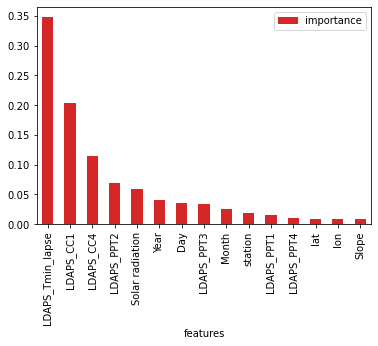

In [98]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
importances = pd.DataFrame({'features':x.columns, 'importance':np.round(RFR.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False).set_index('features')
importances.plot.bar(color='tab:red')
importances

In [99]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [100]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [101]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))


R2_Score: 0.9010162322574505
MAE: 0.7126103790832216
MSE: 0.9254307605474947
RMSE: 0.9619931187630683


The accuracy score for Random Forest Regressor is 90.10%

In [102]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
DTR.score(x_train,y_train)
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))


R2_Score: 0.7734747932597761
MAE: 1.0145635798501254
MSE: 2.117856282274758
RMSE: 1.4552856359748618


 The accuracy score for Decision Tree Regressor is 77.34%

In [103]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
GB.score(x_train,y_train)
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_Score: 0.7983533634430044
MAE: 1.0722496408492328
MSE: 1.885258608423005
RMSE: 1.3730471981774717


The accuracy score for GB is 79.83%

In [104]:
BR=BaggingRegressor()
BR.fit(x_train,y_train)
BR.score(x_train,y_train)
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test, predBR))
print('MSE:',metrics.mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))


R2_Score: 0.8865412811853915
MAE: 0.7693914939323866
MSE: 1.0607616868701253
RMSE: 1.0299328555154095


The accuracy score for BR is 88.65%

In [105]:
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)
XT.score(x_train,y_train)
predXT=XT.predict(x_test)
print('R2_Score:',r2_score(y_test,predXT))
print('MAE:',metrics.mean_absolute_error(y_test, predXT))
print('MSE:',metrics.mean_squared_error(y_test, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))

R2_Score: 0.9143031741995041
MAE: 0.6592628090503578
MSE: 0.8012069098372798
RMSE: 0.8951016198383733


The accuracy for XT is 91.43%

In [106]:
knn = KNN()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn = knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_Score: 0.7500630650988801
MAE: 1.1673471632064156
MSE: 2.336739983024773
RMSE: 1.5286399128064048


The accuracy score for knn is 75.00%

In [107]:
from sklearn.model_selection import cross_val_score

In [108]:
print(cross_val_score(RFR,x,y,cv=5).mean())
print(cross_val_score(DTR,x,y,cv=5).mean())
print(cross_val_score(GB,x,y,cv=5).mean())
print(cross_val_score(BR,x,y,cv=5).mean())
print(cross_val_score(XT,x,y,cv=5).mean())
print(cross_val_score(knn,x,y,cv=5).mean())


0.90687337576192
0.7854065857231364
0.7995947238176097
0.8917473628127344
0.9162093288303982
0.7640704685113225


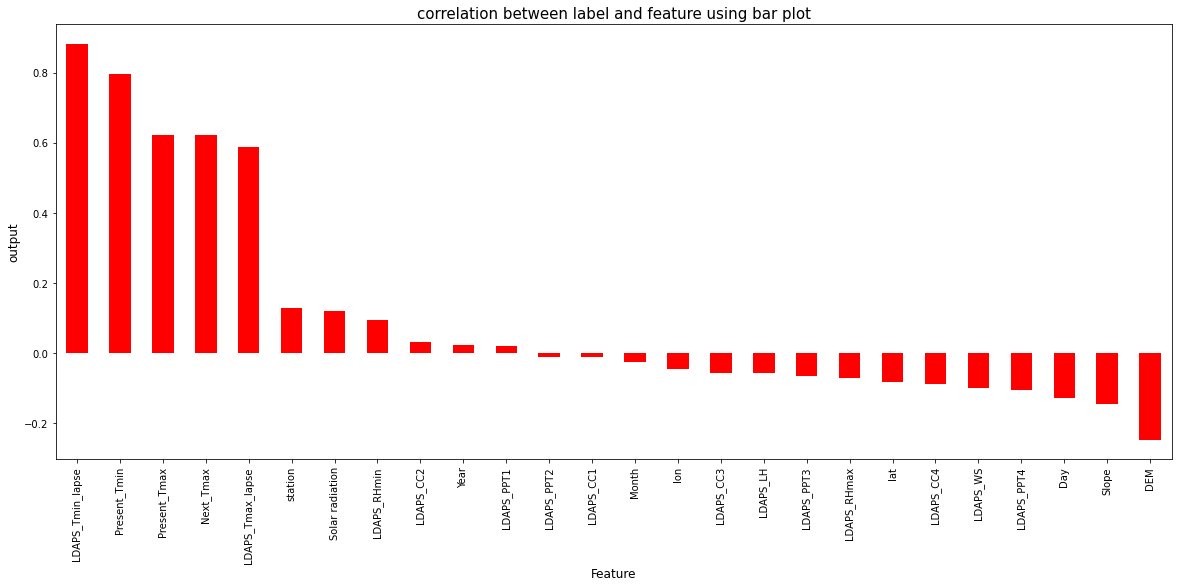

In [109]:
plt.figure(figsize=(20,8))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=12)
plt.ylabel('output',fontsize=12)
plt.title('correlation between label and feature using bar plot',fontsize=15)
plt.show()

In [110]:
x= df.drop("Next_Tmin", axis=1)
y= df["Next_Tmin"]


In [111]:
x.shape

(7752, 26)

In [112]:
y.shape

(7752,)

In [113]:
x.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Day                 0.245283
Month              -0.705586
Year               -0.000365
dtype: float64

In [114]:
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [115]:
x[skew]=scaler.fit_transform(x[skew].values)
x[skew].head()

,LDAPS_RHmax,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Month
5086,0.015498,-1.249736,-1.030493,-1.156421,-0.291226,-1.438408,-0.557339,-0.519114,-0.468210,-0.444377,1.364199,-0.243155,0.953422,-0.126054
1186,-0.537144,1.412025,1.390976,-0.806219,-1.107399,-1.087432,0.343301,-0.519114,-0.492283,-0.444377,1.364199,-0.243155,-0.856619,0.363879
7557,0.525957,0.017017,1.935691,0.092011,1.674884,-1.168556,0.621650,-0.519114,2.562063,-0.444377,0.271491,0.779596,-1.391558,0.363879
5050,2.075554,-1.495356,1.393655,-0.741539,0.166821,0.350808,1.866585,1.730131,0.639499,1.243595,1.834978,1.314153,1.255917,-0.126054
6648,-0.382724,0.209427,-0.654316,-0.514100,-0.427176,-0.587722,-0.557339,-0.519114,-0.492283,-0.444377,-1.400633,-1.072947,0.773298,-0.126054


In [116]:
x.skew()

station             0.000182
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.116481
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.018120
LDAPS_WS            0.002449
LDAPS_LH            0.058865
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.089672
LDAPS_CC4           0.129826
LDAPS_PPT1          1.463941
LDAPS_PPT2          1.646417
LDAPS_PPT3          1.824919
LDAPS_PPT4          2.059400
lat                 0.087062
lon                -0.285213
DEM                 0.039456
Slope               0.233968
Solar radiation    -0.176636
Next_Tmax          -0.340200
Day                 0.245283
Month               0.043780
Year               -0.000365
dtype: float64

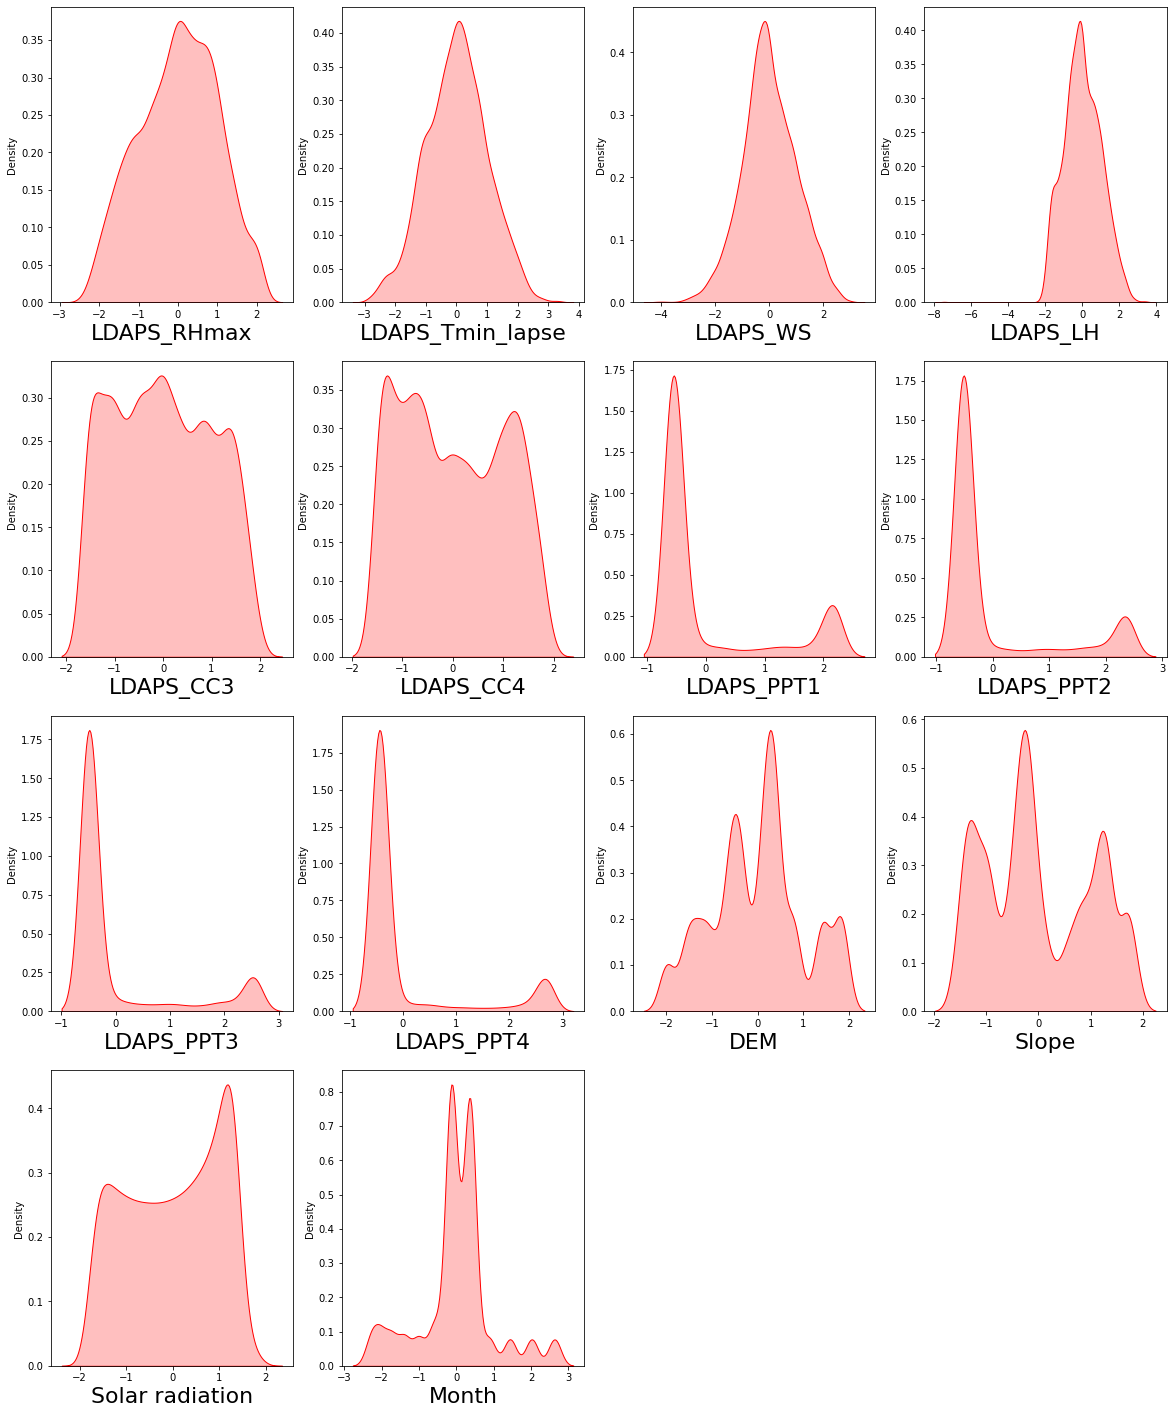

In [117]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in x[skew]:
    if plotnumber<=14:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x[column],color='red',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=22)
    plotnumber+=1
plt.show()

In [118]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()

x= pd.DataFrame(mms.fit_transform(x), columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Day,Month,Year
0,0.458333,0.113636,0.424731,0.476433,0.536702,0.475075,0.264162,0.433785,0.577357,0.347504,...,0.000000,0.500530,0.524272,0.876763,0.383332,0.760201,0.493023,0.416667,0.437757,0.75
1,0.458333,0.642045,0.763441,0.386654,0.416544,0.664838,0.693431,0.771999,0.609479,0.464199,...,0.000000,0.500530,0.524272,0.876763,0.383332,0.275780,0.693023,0.375000,0.537778,0.00
2,0.291667,0.573864,0.725806,0.757030,0.647688,0.534229,0.468455,0.848081,0.691868,0.647605,...,0.000000,0.071504,0.271845,0.590723,0.701013,0.132614,0.534884,0.666667,0.537778,1.00
3,0.000000,0.039773,0.349462,0.809012,0.984607,0.225940,0.224550,0.772373,0.615412,0.516653,...,0.537024,0.786017,0.533981,1.000000,0.867054,0.841158,0.153488,0.375000,0.437757,0.75
4,0.958333,0.539773,0.811828,0.522232,0.450119,0.629018,0.499485,0.486327,0.636273,0.195438,...,0.000000,0.357521,0.268608,0.153008,0.125586,0.711995,0.637209,0.416667,0.437757,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,0.166667,0.732955,0.725806,0.129864,0.749388,0.750901,0.520356,0.592972,0.959096,0.711023,...,0.000000,0.500530,1.000000,0.443625,0.334076,0.807396,0.804651,0.000000,0.644285,0.25
7748,0.583333,0.477273,0.623656,0.805598,0.681836,0.394226,0.458303,0.611882,0.655226,0.810983,...,0.085431,0.500530,0.359223,0.384076,0.502515,0.727780,0.641860,0.416667,0.437757,0.25
7749,0.291667,0.357955,0.639785,0.735831,0.813473,0.463070,0.427195,0.729716,0.602950,0.554486,...,0.000000,0.071504,0.271845,0.590723,0.701013,0.819799,0.455814,0.000000,0.537778,0.00
7750,0.458333,0.676136,0.763441,0.248407,0.146988,0.801886,0.593818,0.612064,0.571044,0.082597,...,0.000000,0.500530,0.524272,0.876763,0.383332,0.505137,0.823256,0.041667,0.110595,1.00


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.598736,station
1,35.154944,Present_Tmax
2,78.080026,Present_Tmin
3,45.986392,LDAPS_RHmin
4,18.751390,LDAPS_RHmax
5,120.720767,LDAPS_Tmax_lapse
6,53.866132,LDAPS_Tmin_lapse
7,20.862029,LDAPS_WS
8,65.951867,LDAPS_LH
9,15.227578,LDAPS_CC1


In [120]:
x.drop("LDAPS_Tmax_lapse",axis=1,inplace=True)

In [121]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif


,VIF values,Features
0,4.586394,station
1,34.024947,Present_Tmax
2,76.651387,Present_Tmin
3,33.305068,LDAPS_RHmin
4,18.645062,LDAPS_RHmax
5,35.936727,LDAPS_Tmin_lapse
6,20.603654,LDAPS_WS
7,60.166399,LDAPS_LH
8,15.194305,LDAPS_CC1
9,17.548304,LDAPS_CC2


In [122]:
x.drop("Present_Tmin",axis=1,inplace=True)

In [123]:
vif = pd.DataFrame()

vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,4.577625,station
1,30.287860,Present_Tmax
2,33.197151,LDAPS_RHmin
3,18.271453,LDAPS_RHmax
4,29.265115,LDAPS_Tmin_lapse
5,19.912521,LDAPS_WS
6,59.373751,LDAPS_LH
7,14.917525,LDAPS_CC1
8,17.546022,LDAPS_CC2
9,17.732365,LDAPS_CC3


In [124]:
x.drop("LDAPS_LH",axis=1,inplace=True)

In [125]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

In [126]:
x.drop("Next_Tmax",axis=1,inplace=True)

In [127]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,4.357750,station
1,22.420439,Present_Tmax
2,31.898138,LDAPS_RHmin
3,15.012201,LDAPS_RHmax
4,19.565808,LDAPS_Tmin_lapse
5,17.942441,LDAPS_WS
6,14.506970,LDAPS_CC1
7,16.963098,LDAPS_CC2
8,17.584827,LDAPS_CC3
9,9.659758,LDAPS_CC4


In [128]:
x.drop("LDAPS_RHmin",axis=1,inplace=True)

In [129]:

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,4.353489,station
1,21.959436,Present_Tmax
2,10.499716,LDAPS_RHmax
3,17.943622,LDAPS_Tmin_lapse
4,17.494162,LDAPS_WS
5,14.424490,LDAPS_CC1
6,15.972219,LDAPS_CC2
7,15.747872,LDAPS_CC3
8,9.644795,LDAPS_CC4
9,3.300489,LDAPS_PPT1


In [130]:
x.drop("Present_Tmax",axis=1,inplace=True)

In [131]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,4.249027,station
1,10.494177,LDAPS_RHmax
2,8.455903,LDAPS_Tmin_lapse
3,16.864879,LDAPS_WS
4,13.559921,LDAPS_CC1
5,15.963881,LDAPS_CC2
6,15.656609,LDAPS_CC3
7,9.638630,LDAPS_CC4
8,3.270818,LDAPS_PPT1
9,2.956593,LDAPS_PPT2


In [132]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,4.249027,station
1,10.494177,LDAPS_RHmax
2,8.455903,LDAPS_Tmin_lapse
3,16.864879,LDAPS_WS
4,13.559921,LDAPS_CC1
5,15.963881,LDAPS_CC2
6,15.656609,LDAPS_CC3
7,9.638630,LDAPS_CC4
8,3.270818,LDAPS_PPT1
9,2.956593,LDAPS_PPT2


In [133]:
x.drop("LDAPS_CC2",axis=1,inplace=True)

In [134]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"]=x.columns

vif

,VIF values,Features
0,4.248361,station
1,10.332545,LDAPS_RHmax
2,8.372376,LDAPS_Tmin_lapse
3,16.864877,LDAPS_WS
4,9.380300,LDAPS_CC1
5,12.867191,LDAPS_CC3
6,9.638528,LDAPS_CC4
7,3.074545,LDAPS_PPT1
8,2.323065,LDAPS_PPT2
9,2.199763,LDAPS_PPT3


In [135]:

x.drop("DEM",axis=1,inplace=True)

In [136]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,3.829317,station
1,10.233455,LDAPS_RHmax
2,8.368864,LDAPS_Tmin_lapse
3,15.907164,LDAPS_WS
4,9.379064,LDAPS_CC1
5,12.859292,LDAPS_CC3
6,9.638458,LDAPS_CC4
7,3.069116,LDAPS_PPT1
8,2.319077,LDAPS_PPT2
9,2.199743,LDAPS_PPT3


In [137]:
x.drop("LDAPS_CC3",axis=1,inplace=True)

In [138]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif


,VIF values,Features
0,3.828820,station
1,10.233447,LDAPS_RHmax
2,8.329200,LDAPS_Tmin_lapse
3,15.887838,LDAPS_WS
4,8.414469,LDAPS_CC1
5,5.075041,LDAPS_CC4
6,2.974335,LDAPS_PPT1
7,2.303829,LDAPS_PPT2
8,1.978233,LDAPS_PPT3
9,2.065988,LDAPS_PPT4


In [139]:
x.drop("LDAPS_RHmax",axis=1,inplace=True)

In [140]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

vif


,VIF values,Features
0,3.827027,station
1,8.309197,LDAPS_Tmin_lapse
2,15.724616,LDAPS_WS
3,8.062834,LDAPS_CC1
4,5.062328,LDAPS_CC4
5,2.934808,LDAPS_PPT1
6,2.283370,LDAPS_PPT2
7,1.967442,LDAPS_PPT3
8,2.063703,LDAPS_PPT4
9,4.529042,lat


In [141]:

x.head()

,station,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_CC1,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,Slope,Solar radiation,Day,Month,Year
0,0.458333,0.264162,0.433785,0.347504,0.012868,0.000000,0.000000,0.007881,0.000000,0.500530,0.524272,0.383332,0.760201,0.416667,0.437757,0.75
1,0.458333,0.693431,0.771999,0.464199,0.116964,0.326776,0.000000,0.000000,0.000000,0.500530,0.524272,0.383332,0.275780,0.375000,0.537778,0.00
2,0.291667,0.468455,0.848081,0.647605,0.092903,0.427768,0.000000,0.999932,0.000000,0.071504,0.271845,0.701013,0.132614,0.666667,0.537778,1.00
3,0.000000,0.224550,0.772373,0.516653,0.543532,0.879464,0.775648,0.370523,0.537024,0.786017,0.533981,0.867054,0.841158,0.375000,0.437757,0.75
4,0.958333,0.499485,0.486327,0.195438,0.265173,0.000000,0.000000,0.000000,0.000000,0.357521,0.268608,0.125586,0.711995,0.416667,0.437757,1.00


In [142]:
x.shape

(7752, 16)

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=115)

In [147]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [148]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.8878931925831671
MAE: 0.6383869015797222
MSE: 0.7090946551733819
RMSE: 0.8420775826332049


The accuracy score for RFR is 88.78%

In [150]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
preddtr =dtr.predict(x_test)
print('R2_Score:',r2_score(y_test,preddtr))
print('MAE:',metrics.mean_absolute_error(y_test, preddtr))
print('MSE:',metrics.mean_squared_error(y_test, preddtr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, preddtr)))

R2_Score: 0.7580668756354043
MAE: 0.935067833162199
MSE: 1.530268226785424
RMSE: 1.237040107185464


The accuracy score for DTR is 75.80%

In [151]:
knn=KNN()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
knn.score(x_train,y_train)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_Score: 0.7742138675308852
MAE: 0.8976467945025557
MSE: 1.4281357522815228
RMSE: 1.1950463389682942


The accuracy score for knn is 77.42%

In [152]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
GB.score(x_train,y_train)
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_Score: 0.8815013101299557
MAE: 0.6651808047764248
MSE: 0.7495244005965681
RMSE: 0.8657507727958249


The accuracy score for GB is 88.15%

In [153]:
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)
BR.score(x_train,y_train)
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test, predBR))
print('MSE:',metrics.mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

R2_Score: 0.8745029944797234
MAE: 0.675283655983994
MSE: 0.7937899393014984
RMSE: 0.8909488982548317


The accuracy score for BR is 87.45%

In [154]:
XT=ExtraTreesRegressor()
XT.fit(x_train,y_train)
XT.score(x_train,y_train)
predXT=XT.predict(x_test)
print('R2_Score:',r2_score(y_test,predXT))
print('MAE:',metrics.mean_absolute_error(y_test, predXT))
print('MSE:',metrics.mean_squared_error(y_test, predXT))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predXT)))


R2_Score: 0.9049708288720718
MAE: 0.5877726207470355
MSE: 0.6010756963386035
RMSE: 0.7752907173045499


The accuracy score for XT is 90.49%

In [155]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
SGD.score(x_train,y_train)
predSGD=XT.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))


R2_Score: 0.9049708288720718
MAE: 0.5877726207470355
MSE: 0.6010756963386035
RMSE: 0.7752907173045499


The accuracy score for SGD is 90.49%

In [156]:
from sklearn.model_selection import cross_val_score

In [159]:
print("Print cross_val_score for RFR:",cross_val_score(RFR,x,y,cv=5).mean())
print("Print cross_val_score for DTR:",cross_val_score(dtr,x,y,cv=5).mean())
print("Print cross_val_score for knn:",cross_val_score(knn,x,y,cv=5).mean())
print("Print cross_val_score for GB:",cross_val_score(GB,x,y,cv=5).mean())
print("Print cross_val_score for BR:",cross_val_score(BR,x,y,cv=5).mean())
print("Print cross_val_score for SGD:",cross_val_score(SGD,x,y,cv=5).mean())
print("Print cross_val_score for XT:",cross_val_score(XT,x,y,cv=5).mean())

Print cross_val_score for RFR: 0.8912839116999113
Print cross_val_score for DTR: 0.7641381597052733
Print cross_val_score for knn: 0.7875743176386137
Print cross_val_score for GB: 0.8770983581167302
Print cross_val_score for BR: 0.8782131309500365
Print cross_val_score for SGD: 0.7640230609171653
Print cross_val_score for XT: 0.9073767442047476


In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance'],
              'p':[1,2,3,4,5]}

In [169]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_params_

In [ ]:
Temp= KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance',p=1)
Temp.fit(x_df_train, y_df_train)
pred=Temp.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)